## Credit Card Fraud Detection

In this project we have predicted fraudulent credit card transactions with the help of Machine learning models. 

In [1]:
pip install termcolor

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

from termcolor import colored

## 1. Exploratory data analysis

### a. Understanding variables

In [3]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#observe the different feature type present in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.shape

(284807, 31)

In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
df.nunique(axis=0)

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [8]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,...,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,94813.859575,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,88.349619,0.001727
std,47488.145955,1.958696,1.651309,1.516255,1.415869,1.380247,1.332271,1.237094,1.194353,1.098632,...,0.734524,0.725702,0.624460,0.605647,0.521278,0.482227,0.403632,0.330083,250.120109,0.041527
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54201.500000,-0.920373,-0.598550,-0.890365,-0.848640,-0.691597,-0.768296,-0.554076,-0.208630,-0.643098,...,-0.228395,-0.542350,-0.161846,-0.354586,-0.317145,-0.326984,-0.070840,-0.052960,5.600000,0.000000
50%,84692.000000,0.018109,0.065486,0.179846,-0.019847,-0.054336,-0.274187,0.040103,0.022358,-0.051429,...,-0.029450,0.006782,-0.011193,0.040976,0.016594,-0.052139,0.001342,0.011244,22.000000,0.000000
75%,139320.500000,1.315642,0.803724,1.027196,0.743341,0.611926,0.398565,0.570436,0.327346,0.597139,...,0.186377,0.528554,0.147642,0.439527,0.350716,0.240952,0.091045,0.078280,77.165000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


### b. Cleaning the data set

In [9]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


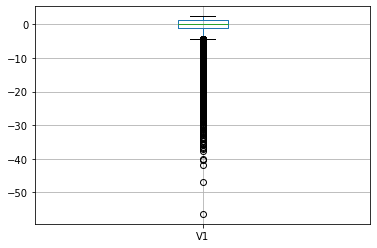

In [10]:
# Outliers check
print(df.boxplot(column='V1'))

AxesSubplot(0.125,0.125;0.775x0.755)


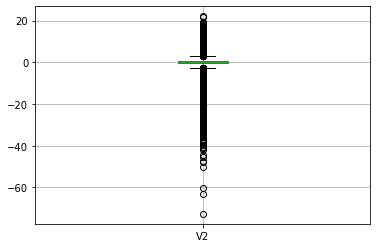

In [11]:
# Outliers check
print(df.boxplot(column='V2'))

###### OBSERVATIONS
######  1. Though there seems to be outliers, the data is PCA transfrmed and hence we need not do any more outlier treatment.
###### 2. e also do not have to do variable selection or feature reduction as the data is PCA transformed.
###### 3. There are no rows with null values, so no data reduction required.

### c. Analyzing relationship

Here we will observe the distribution of our classes

In [12]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

print(colored("normal_share:", "blue", attrs=["bold"]))
print(normal_share)
print("\n")
print(colored("fraud_share:", "blue", attrs=["bold"]))
print(fraud_share)

normal_share:
99.82725143693798


fraud_share:
0.1727485630620034


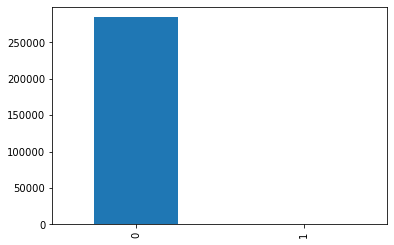

In [13]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

# plot
df["Class"].value_counts().plot.bar()
plt.show()

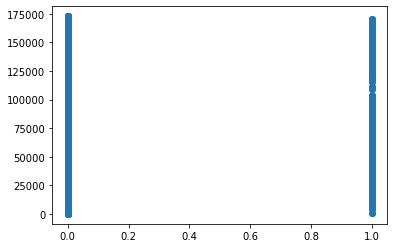

In [14]:
# Create a scatter plot to observe the distribution of classes with time
plt.scatter(df["Class"],df["Time"])
plt.show()

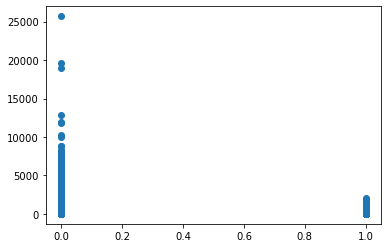

In [15]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.scatter(df["Class"],df["Amount"])
plt.show()

In [16]:
df_fraud = df[df.Class == 1]
df_normal = df[df.Class == 0]

In [17]:
df_fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [18]:
df_normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

C:\Users\dibas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\dibas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


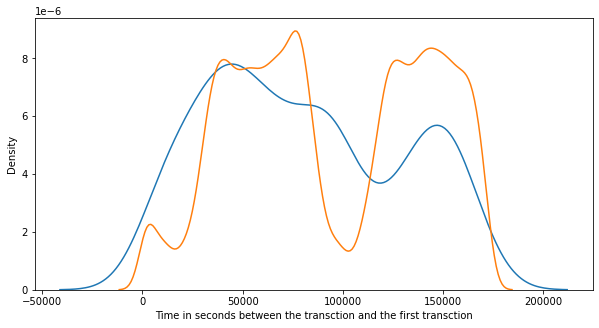

In [19]:
plt.figure(figsize=(10,5))
ax = sns.distplot(df_fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(df_normal['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Time in seconds between the transction and the first transction')
plt.show()

<AxesSubplot:>

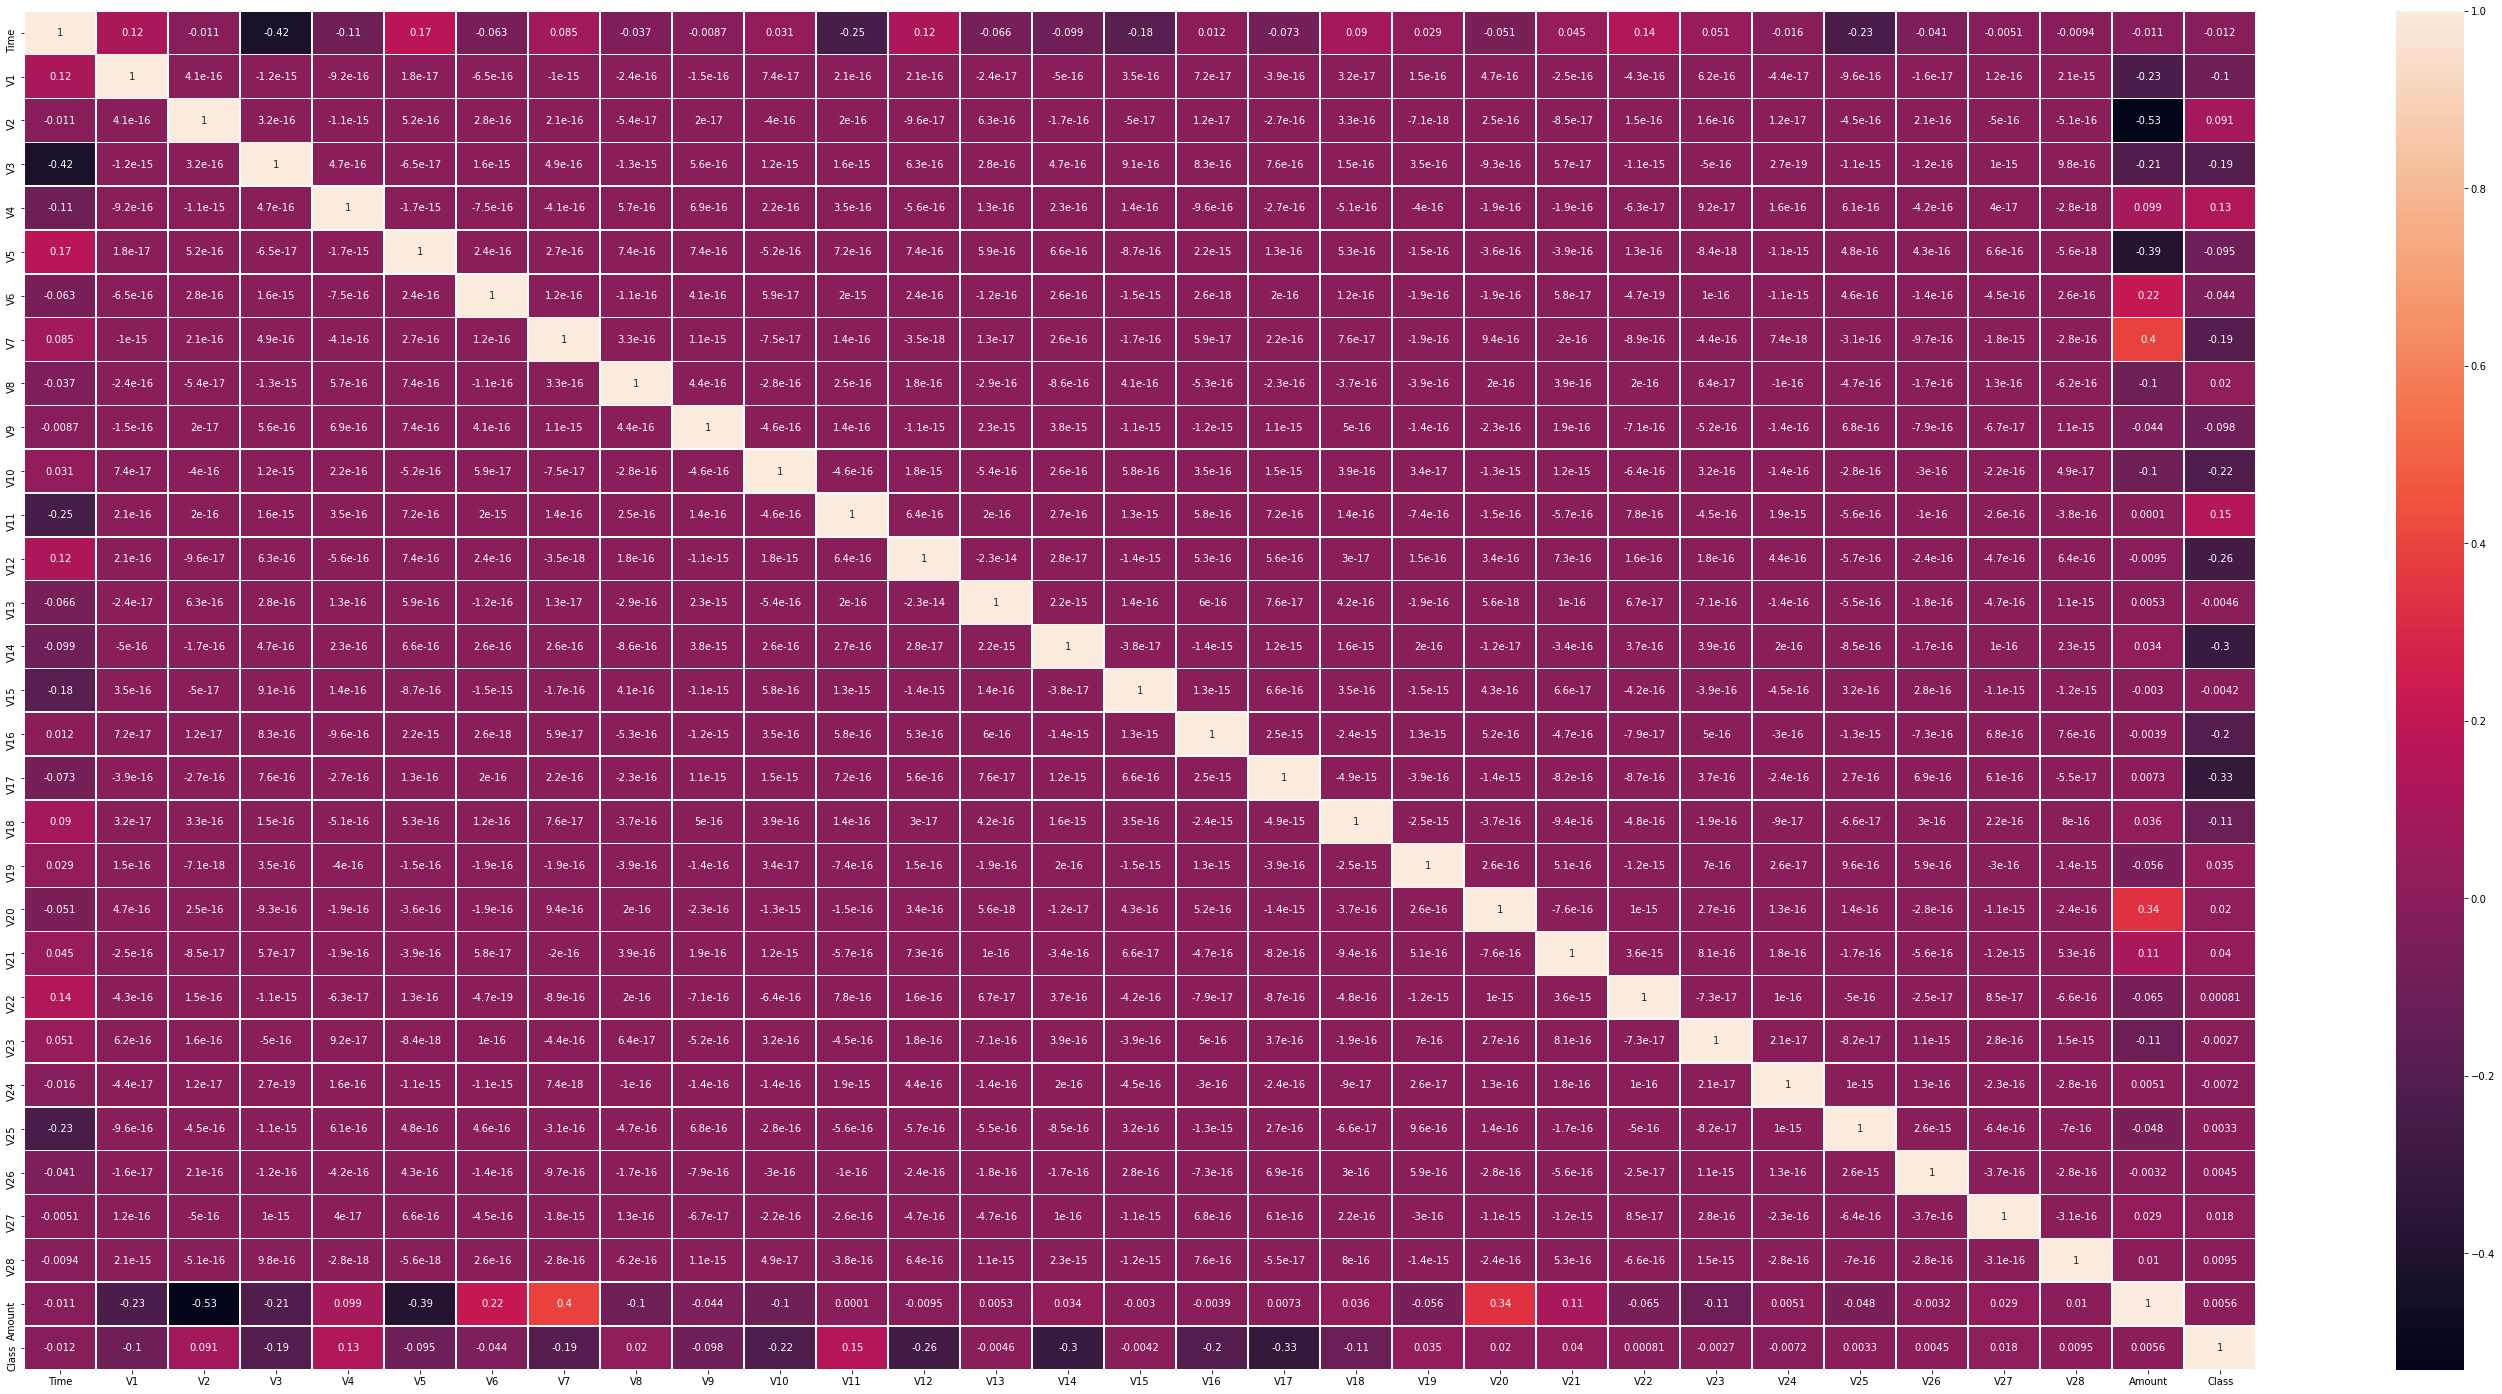

In [20]:
# calculate correlation matrix
plt.subplots(figsize=(50,25))
corr = df.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.5)

In [21]:
# Dropping time as there is no corelation between Class and Time elapsed.
df.drop('Time', axis=1, inplace=True)

In [22]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


###### OBSERVATIONS
######  1. The fraudant transaction share is .172 % while the normal trasaction is 99.82%
######  2. The fraudant transaction has happened with lower amounts of transaction. Normal transaction ranges from 0-25691, fraudant transaction ranges from 0- 2125 
######  3. The fraudant transactions have no pattern with time elapsed. So deleted the time column to reduce any noise that it might create.
###### 4. As PCA is already done, the correlation between the pricipal components are reduced to a great extent


### d. Feature Selection 

In [23]:
# Trying out ExtraTreesClassifier for feature selection
x_fs = df.drop('Class', axis = 'columns')
y_fs = df['Class']

In [24]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x_fs, y_fs)

ExtraTreesClassifier()

In [25]:
model.feature_importances_

array([0.01386817, 0.01713627, 0.03466223, 0.03422403, 0.01372286,
       0.01466549, 0.02343606, 0.01382567, 0.03025383, 0.07193476,
       0.07587588, 0.10539098, 0.01201383, 0.12386763, 0.01221804,
       0.07833677, 0.13420093, 0.04210916, 0.01562811, 0.0152795 ,
       0.01760323, 0.01412881, 0.01055998, 0.01356311, 0.01041102,
       0.01462539, 0.01356194, 0.01065709, 0.01223922])

<AxesSubplot:>

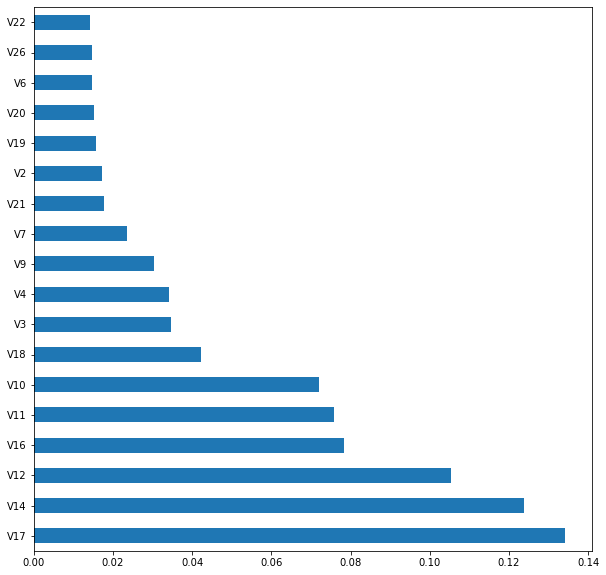

In [26]:
plt.figure(figsize = (10,10))
feat = pd.Series(model.feature_importances_, index = x_fs.columns)
feat.nlargest(18).plot(kind = 'barh')

In [27]:
# Trying out PCA
from sklearn.decomposition import PCA
pca = PCA(random_state=42)

In [28]:
pca.fit(x_fs)

PCA(random_state=42)

In [29]:
pca.components_

array([[-1.78322294e-03, -3.50839517e-03, -1.27837144e-03,
         5.58889315e-04, -2.13201563e-03,  1.15041177e-03,
         1.96506336e-03, -4.92204583e-04, -1.94340470e-04,
        -4.41859173e-04,  4.24307536e-07, -3.81173631e-05,
         2.10628711e-05,  1.29349023e-04, -1.09263994e-05,
        -1.36959278e-05,  2.48186427e-05,  1.19463813e-04,
        -1.82742240e-04,  1.04608011e-03,  3.11274610e-04,
        -1.88006789e-04, -2.81192640e-04,  1.24607097e-05,
        -9.96934250e-05, -6.18479087e-06,  4.65153221e-05,
         1.35371917e-05,  9.99985487e-01],
       [-9.80433374e-01,  1.72567606e-01,  4.42815127e-02,
        -1.60858256e-02,  5.80420947e-02, -2.92504999e-02,
        -4.44477841e-02,  1.06342606e-02,  3.83575233e-03,
         8.64819658e-03, -7.86315145e-06,  6.95207483e-04,
        -3.83065148e-04, -2.29279454e-03,  1.88275355e-04,
         2.30451122e-04, -4.11191015e-04, -1.96700563e-03,
         2.96998210e-03, -1.66325238e-02, -4.86462522e-03,
         2.92

In [30]:
pca.explained_variance_ratio_

array([9.99538016e-01, 5.98389764e-05, 3.89223784e-05, 3.52277435e-05,
       3.19393954e-05, 2.89369713e-05, 2.65990695e-05, 2.28725408e-05,
       1.93617816e-05, 1.91173325e-05, 1.66454989e-05, 1.59551214e-05,
       1.58273371e-05, 1.47614475e-05, 1.34004927e-05, 1.33414159e-05,
       1.22664499e-05, 1.15239480e-05, 1.11996856e-05, 1.05522684e-05,
       8.69556251e-06, 8.43642066e-06, 6.43786275e-06, 5.86073004e-06,
       4.39641289e-06, 3.71557695e-06, 2.64706259e-06, 1.81033817e-06,
       1.69379866e-06])

<BarContainer object of 29 artists>

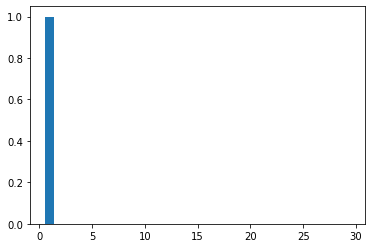

In [31]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

###### OBSERVATIONS
###### 1. Tried out ExtraTreesClassifier and from the graph it appears that there are certain variables which have very less say and do not have much importance. 
###### 2. Tried out PCA as well and from the graph it again looks like a couple of features explain the most of the data and there are many features that can be removed.
###### 3. Though both the feature reduction techniques suggest that feature reduction can be done as there are multiple features that have very less say (they are so very less that they dnt even appear in the chart above), however I will choose NOT TO GO FOR feature reduction as the data is already PCA transformed.

## 2. Model Building

##### 1. Splitting the data into train & test data

In [32]:
y= df['Class']

In [33]:
X = df.drop(['Class'], axis=1)

In [34]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [36]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


###### 2. Scaling

In [37]:
# Scaling the amount column before fixing skewness
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [38]:
# Fit the data into scaler and transform
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

<ipython-input-38-11b47c18023d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])


In [39]:
X_train.head() # Check for scaling

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
201788,2.023734,-0.429219,-0.691061,-0.201461,-0.162486,0.283718,-0.674694,0.192230,1.124319,-0.037763,...,-0.171390,-0.195207,-0.477813,0.340513,0.059174,-0.431015,-0.297028,-0.000063,-0.046947,-0.345273
179369,-0.145286,0.736735,0.543226,0.892662,0.350846,0.089253,0.626708,-0.049137,-0.732566,0.297692,...,0.206709,-0.124288,-0.263560,-0.110568,-0.434224,-0.509076,0.719784,-0.006357,0.146053,-0.206439
73138,-3.015846,-1.920606,1.229574,0.721577,1.089918,-0.195727,-0.462586,0.919341,-0.612193,-0.966197,...,0.842838,0.274911,-0.319550,0.212891,-0.268792,0.241190,0.318445,-0.100726,-0.365257,0.358043
208679,1.851980,-1.007445,-1.499762,-0.220770,-0.568376,-1.232633,0.248573,-0.539483,-0.813368,0.785431,...,-0.196551,-0.406722,-0.899081,0.137370,0.075894,-0.244027,0.455618,-0.094066,-0.031488,0.362400
206534,2.237844,-0.551513,-1.426515,-0.924369,-0.401734,-1.438232,-0.119942,-0.449263,-0.717258,0.851668,...,-0.045417,0.050447,0.125601,0.215531,-0.080485,-0.063975,-0.307176,-0.042838,-0.063872,-0.316109


In [40]:
# Transform the test set
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

<ipython-input-40-d99d69664984>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Amount'] = scaler.transform(X_test[['Amount']])


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
49089,1.229452,-0.235478,-0.627166,0.419877,1.797014,4.069574,-0.896223,1.036103,0.745991,-0.147304,...,-0.057922,-0.170060,-0.288750,-0.130270,1.025935,0.847990,-0.271476,0.060052,0.018104,-0.340485
154704,2.016893,-0.088751,-2.989257,-0.142575,2.675427,3.332289,-0.652336,0.752811,1.962566,-1.025024,...,-0.147619,-0.184153,-0.089661,0.087188,0.570679,0.101899,0.620842,-0.048958,-0.042831,-0.320859
67247,0.535093,-1.469185,0.868279,0.385462,-1.439135,0.368118,-0.499370,0.303698,1.042073,-0.437209,...,0.437685,0.028010,-0.384708,-0.128376,0.286638,-0.136700,0.913904,-0.083364,0.052485,0.853442
251657,2.128486,-0.117215,-1.513910,0.166456,0.359070,-0.540072,0.116023,-0.216140,0.680314,0.079977,...,-0.227278,-0.357993,-0.905085,0.223474,-1.075605,-0.188519,0.267672,-0.071733,-0.072238,-0.344410
201903,0.558593,1.587908,-2.368767,5.124413,2.171788,-0.500419,1.059829,-0.254233,-1.959060,0.948915,...,0.249457,-0.035049,0.271455,0.381606,0.332001,-0.334757,0.448890,0.168585,0.004955,-0.229480


###### 3. Check for skewness

In [41]:
cols = X_train.columns
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

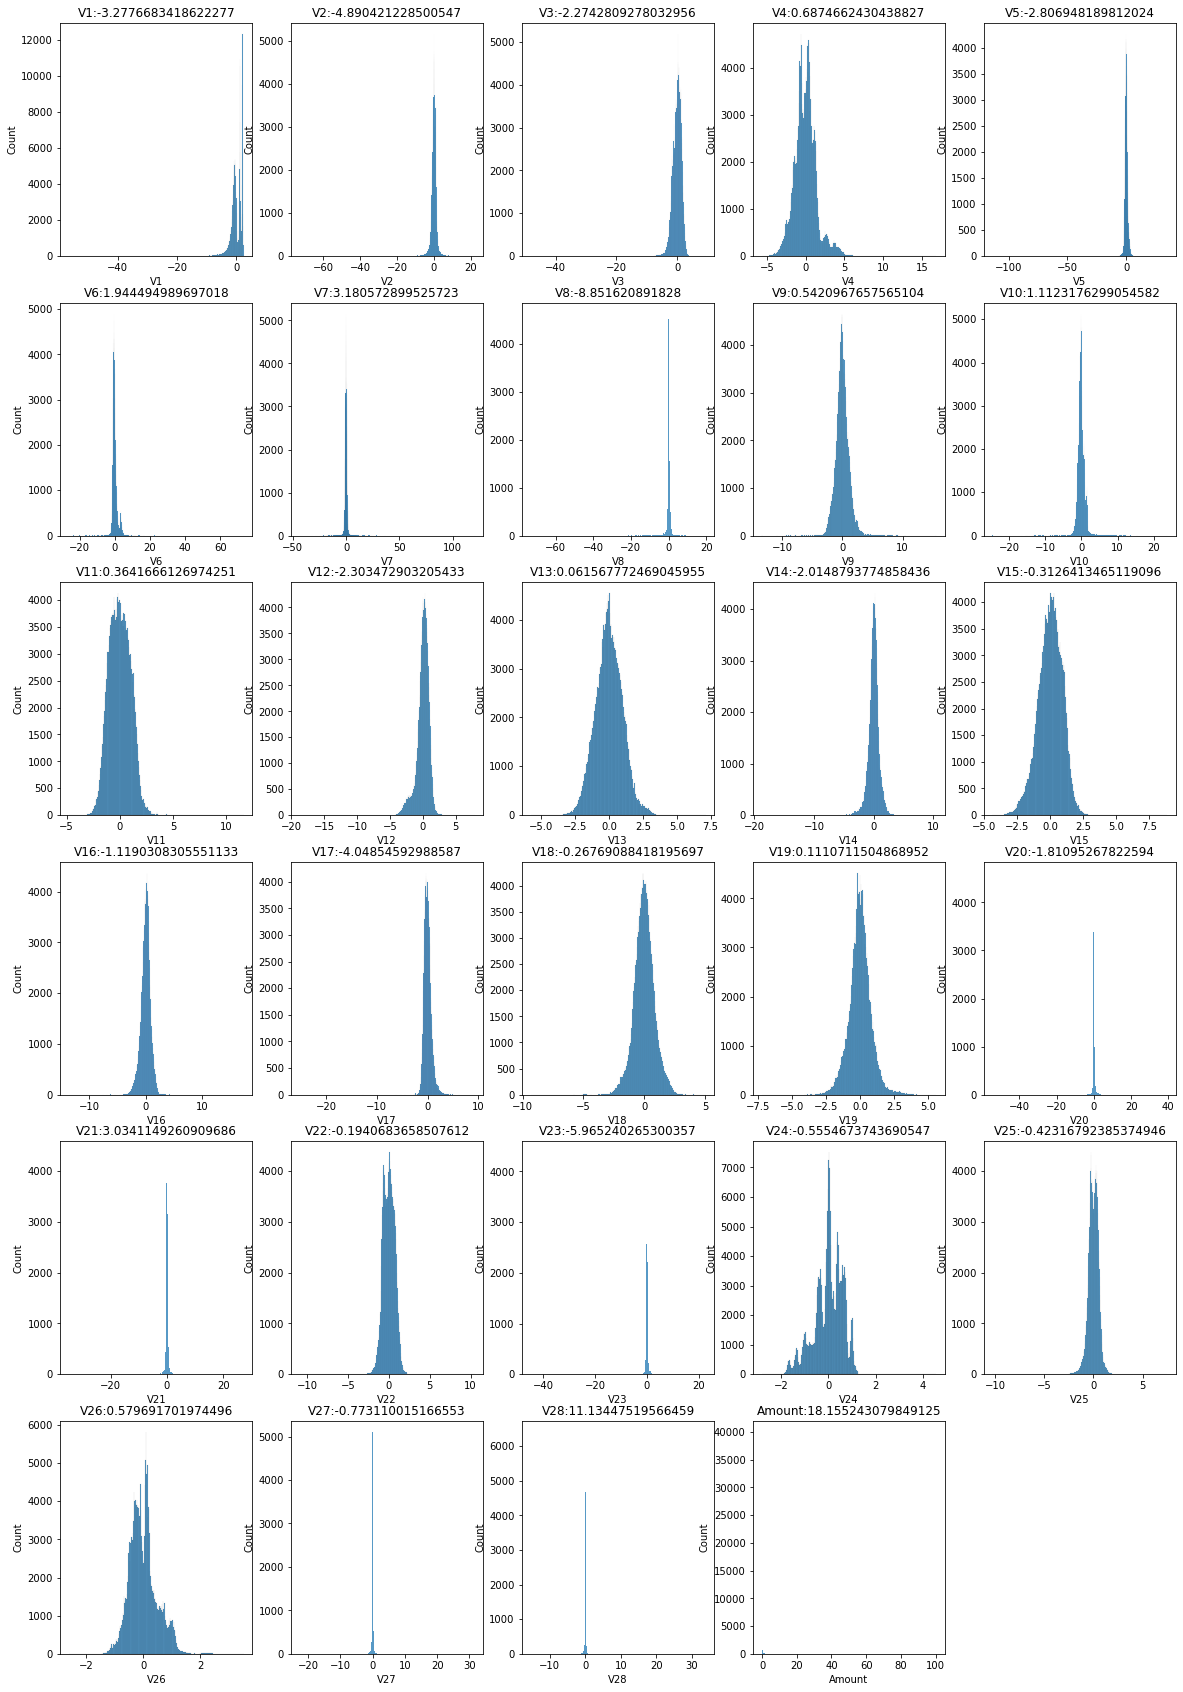

In [42]:
# plot the histogram of a variable from the dataset to see the skewness
n=1
plt.figure(figsize=(20,30))
for col in cols :    
    plt.subplot(6, 5,n)    
    sns.histplot(X_train[col])
    plt.title(col+':'+str(X_train[col].skew()))
    n=n+1

In [43]:
X_train.skew(axis = 0, skipna = True)

V1        -3.277668
V2        -4.890421
V3        -2.274281
V4         0.687466
V5        -2.806948
V6         1.944495
V7         3.180573
V8        -8.851621
V9         0.542097
V10        1.112318
V11        0.364167
V12       -2.303473
V13        0.061568
V14       -2.014879
V15       -0.312641
V16       -1.119031
V17       -4.048546
V18       -0.267691
V19        0.111071
V20       -1.810953
V21        3.034115
V22       -0.194068
V23       -5.965240
V24       -0.555467
V25       -0.423168
V26        0.579692
V27       -0.773110
V28       11.134475
Amount    18.155243
dtype: float64

###### Skewness is present so using  <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [44]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)

X_train[cols] = pt.fit_transform(X_train)

<ipython-input-44-b6510f039246>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[cols] = pt.fit_transform(X_train)
C:\Users\dibas\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\dibas\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

In [45]:
# plot the histogram of a variable from the dataset again to see the result
X_train.skew(axis = 0, skipna = True)

V1       -0.218078
V2        0.341223
V3       -0.081054
V4        0.019541
V5       -1.300984
V6       -2.027134
V7        2.870413
V8        2.242749
V9       -0.051976
V10      -1.285471
V11       0.062395
V12       0.160914
V13       0.006460
V14       0.107647
V15       0.013333
V16       0.165158
V17      -0.768039
V18      -0.061821
V19       0.014897
V20      -1.047089
V21      -1.890567
V22      -0.022394
V23      -0.308486
V24       0.113646
V25       0.083366
V26      -0.024907
V27       3.533355
V28       1.484209
Amount    0.709380
dtype: float64

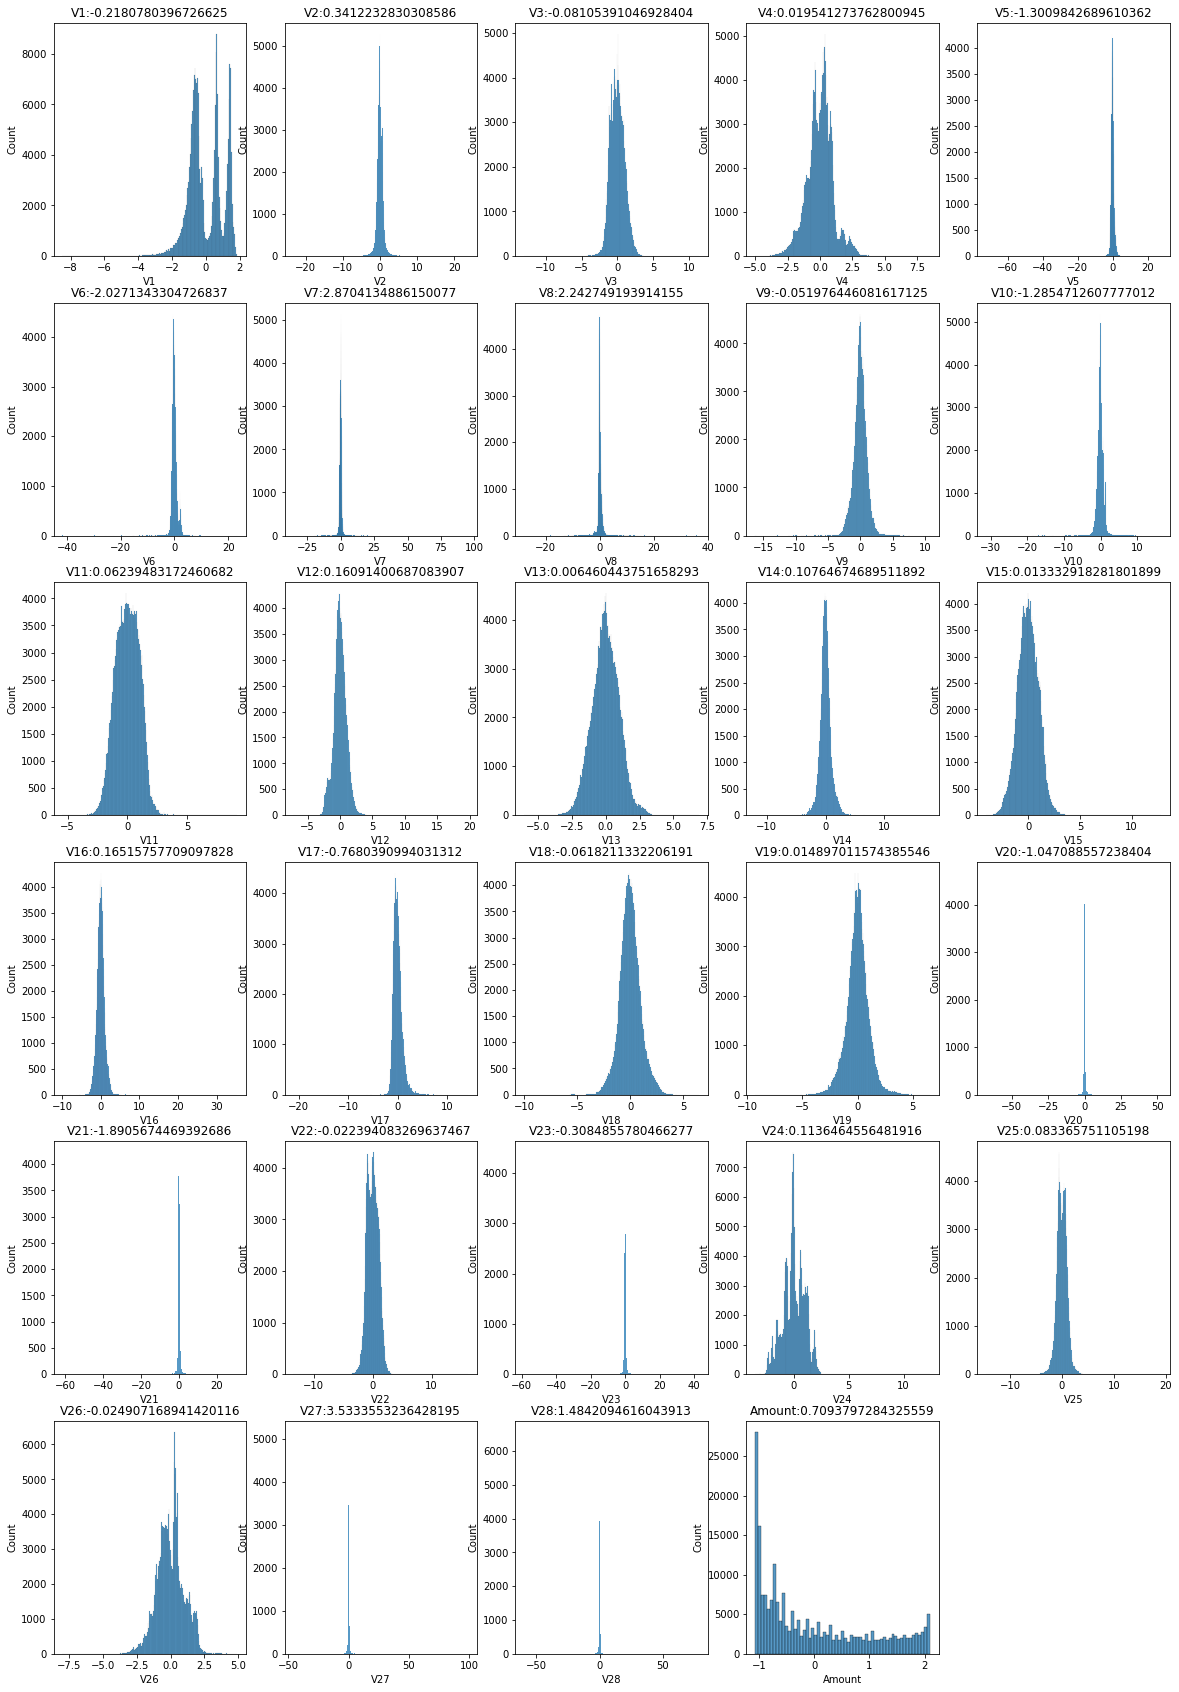

In [46]:
# plot the histogram of a variable from the dataset to see the skewness
n=1
plt.figure(figsize=(20,30))
for col in cols :    
    plt.subplot(6, 5,n)    
    sns.histplot(X_train[col])
    plt.title(col+':'+str(X_train[col].skew()))
    n=n+1

In [47]:
X_test = pt.transform(X_test)

###### 4. Models Building with Class Imbalance

#### Model 1  - Logistic Regression

In [48]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [49]:
# Use k-fold cross validation to choose the optimal C, then build the final LR model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [50]:
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# choosing different values of C as a regulaization hyperparameter, the higher the value of C, lesser the regularization
params = {"C": [0.01, 0.1, 1, 10, 100]}

model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [51]:
cv_df = pd.DataFrame(model_cv.cv_results_)
cv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.446750,1.098188,0.039772,0.003236,0.01,{'C': 0.01},0.986856,0.987234,0.968390,0.982373,...,0.983719,0.008479,1,0.984043,0.984587,0.988474,0.985596,0.983075,0.985155,0.001849
1,3.408466,2.122559,0.026999,0.012085,0.1,{'C': 0.1},0.986104,0.987144,0.960929,0.980620,...,0.981416,0.010893,2,0.982402,0.983785,0.987917,0.984018,0.981187,0.983862,0.002270
2,0.809218,0.087801,0.018908,0.003492,1,{'C': 1},0.985834,0.986806,0.958452,0.979781,...,0.980484,0.011635,3,0.981722,0.983322,0.987492,0.983305,0.980489,0.983266,0.002365
3,4.664413,4.823236,0.046614,0.029066,10,{'C': 10},0.985798,0.986754,0.958181,0.979674,...,0.980375,0.011715,4,0.981632,0.983262,0.987435,0.983216,0.980404,0.983190,0.002375
4,6.169591,4.397368,0.040172,0.031582,100,{'C': 100},0.985793,0.986748,0.958155,0.979666,...,0.980365,0.011722,5,0.981625,0.983256,0.987429,0.983207,0.980396,0.983182,0.002376


In [52]:
# Best value of C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9837192853831933 at C = 0.01


In [53]:
# Building LR with optimal C
logistic_reg_1 = LogisticRegression(C=0.01)

In [54]:
model1 = logistic_reg_1.fit(X_train, y_train)

In [55]:
y_train_pred = model1.predict(X_train)

In [56]:
confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion_matrix)

[[227427     22]
 [   135    261]]


In [57]:
TP = confusion_matrix[1,1] # true positives 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [58]:
# Accuracy
auccuracy = metrics.accuracy_score(y_train, y_train_pred)
print("Accuracy:", auccuracy)

# Sensitivity
sensitivity = TP / float(TP+FN)
print("Sensitivity",sensitivity)

# Specificity
specificity =  TN / float(TN+FP)                          
print("Specificity",specificity )

# F1 score
f1_score_train = f1_score(y_train, y_train_pred)
print("F1-Score:",f1_score_train )

Accuracy: 0.9993109350655051
Sensitivity 0.6590909090909091
Specificity 0.9999032750198946
F1-Score: 0.7687776141384388


In [59]:
y_train_predict_proba = model1.predict_proba(X_train)[:,1]

In [60]:
from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(y_train, y_train_predict_proba)

In [61]:
print(auc_score)

0.9850627519962183


In [62]:
#summary_df = pd.DataFrame([{'Model':'Linear Regression', 'Class':'Imbalanced', 'Train/Test':'Train', 'Accuracy':auccuracy, 'Sensitivity':sensitivity, 'Specificity':specificity, 'F1-Score':f1_score_train, 'AUC-ROC':auc_score}])

In [63]:
#summary_df.head()

In [64]:
# prediction on test set
y_test_pred = model1.predict(X_test)

In [65]:
# Confusion matrix
confusion_matrix_test = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion_matrix_test)

[[56850    16]
 [   42    54]]


In [66]:
TP = confusion_matrix_test[1,1] # true positive 
TN = confusion_matrix_test[0,0] # true negatives
FP = confusion_matrix_test[0,1] # false positives
FN = confusion_matrix_test[1,0] # false negatives

In [67]:
# Accuracy
auccuracy = metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy:", auccuracy)

# Sensitivity
sensitivity = TP / float(TP+FN)
print("Sensitivity",sensitivity)

# Specificity
specificity =  TN / float(TN+FP)                          
print("Specificity",specificity )

# F1 score
f1_score_test = f1_score(y_test, y_test_pred)
print("F1-Score:",f1_score_test )

#Precision = TP/(TP+FP)
precision = TP/float(TP+FP)
print("Precision",precision )

Accuracy: 0.9989817773252344
Sensitivity 0.5625
Specificity 0.9997186367952731
F1-Score: 0.6506024096385543
Precision 0.7714285714285715


In [68]:
y_test_predict_proba = model1.predict_proba(X_test)[:,1]

In [69]:
auc_score = roc_auc_score(y_test, y_test_predict_proba)
print (auc_score)

0.9668121475632775


In [70]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_predict_proba)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Threshold= 0.0011162805816207655


In [71]:
summary_df = pd.DataFrame([{'Model':'Linear Regression', 'Class':'Imbalanced',  'Accuracy':auccuracy, 'Sensitivity':sensitivity, 'Specificity':specificity, 'F1-Score':f1_score_train, 'AUC-ROC':auc_score, 'Precision':precision,'FPR':fpr, 'TPR':tpr, 'Threshold':threshold }])

In [72]:
#smmary_df = summary_df.append(dict, ignore_index = True)

In [73]:
summary_df.head()

,Model,Class,Accuracy,Sensitivity,Specificity,F1-Score,AUC-ROC,Precision,FPR,TPR,Threshold
0,Linear Regression,Imbalanced,0.998982,0.5625,0.999719,0.768778,0.966812,0.771429,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.1145833333333333...",0.001116


#### Model 2 - XGBoost

In [74]:
!pip install xgboost

In [75]:
from xgboost import XGBClassifier

In [76]:
folds = 2

In [77]:
#Hyperparameter Tuning
params = {'learning_rate': [0.2, 0.6],'subsample': [0.3, 0.6]}
xgb_model = XGBClassifier(max_depth=2, n_estimators=100)
model_cross_validation = GridSearchCV(estimator = xgb_model,param_grid = params, scoring= 'roc_auc', cv = folds, verbose = 1, return_train_score=True)      
model_cross_validation.fit(X_train, y_train)     

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[15:27:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\dibas\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dibas\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:27:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\dibas\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:27:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\dibas\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:27:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\dibas\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:27:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\dibas\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:27:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\dibas\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:27:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\dibas\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:27:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\dibas\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:27:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=No

In [78]:
results = pd.DataFrame(model_cross_validation.cv_results_)

In [79]:
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,2.119705,0.012617,0.053101,0.002957,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.963360,0.971415,0.967387,0.004027,3,0.997584,0.999312,0.998448,8.637591e-04
1,2.899429,0.000458,0.050218,0.000086,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.975400,0.976207,0.975804,0.000404,1,0.999605,0.999781,0.999693,8.807748e-05
2,2.228452,0.050263,0.051148,0.001012,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.961144,0.967555,0.964350,0.003205,4,0.999612,0.999974,0.999793,1.812603e-04
3,2.979217,0.001319,0.051157,0.001015,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.974585,0.971645,0.973115,0.001470,2,0.999999,1.000000,1.000000,2.664612e-07


In [80]:
model_cross_validation.best_params_

{'learning_rate': 0.2, 'subsample': 0.6}

In [81]:
params = {'learning_rate': 0.2, 'max_depth': 2, 'n_estimators':100, 'subsample':0.6, 'objective':'binary:logistic'}

In [82]:
model_xg = XGBClassifier(params = params)
model_xg.fit(X_train, y_train)

C:\Users\dibas\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:27:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:27:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 100,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [83]:
y_train_pred = model_xg.predict(X_train)

In [84]:
confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion_matrix)

[[227449      0]
 [     0    396]]


In [85]:
TP = confusion_matrix[1,1] # true positives 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [86]:
# Accuracy
auccuracy = metrics.accuracy_score(y_train, y_train_pred)
print("Accuracy:", auccuracy)

# Sensitivity
sensitivity = TP / float(TP+FN)
print("Sensitivity",sensitivity)

# Specificity
specificity =  TN / float(TN+FP)                          
print("Specificity",specificity )

# F1 score
f1_score_train = f1_score(y_train, y_train_pred)
print("F1-Score:",f1_score_train)

Accuracy: 1.0
Sensitivity 1.0
Specificity 1.0
F1-Score: 1.0


In [87]:
y_test_pred = model_xg.predict(X_test)

In [88]:
confusion_matrix_test = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion_matrix_test)

[[56859     7]
 [   24    72]]


In [89]:
TP = confusion_matrix_test[1,1] # true positives 
TN = confusion_matrix_test[0,0] # true negatives
FP = confusion_matrix_test[0,1] # false positives
FN = confusion_matrix_test[1,0] # false negatives

In [90]:
# Accuracy
auccuracy = metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy:", auccuracy)

# Sensitivity
sensitivity = TP / float(TP+FN)
print("Sensitivity",sensitivity)

# Specificity
specificity =  TN / float(TN+FP)                          
print("Specificity",specificity )

# F1 score
f1_score_test = f1_score(y_test, y_test_pred)
print("F1-Score:",f1_score_test) 

#Precision = TP/(TP+FP)
precision = TP/float(TP+FP)
print("Precision",precision )

Accuracy: 0.9994557775359011
Sensitivity 0.75
Specificity 0.999876903597932
F1-Score: 0.8228571428571428
Precision 0.9113924050632911


In [91]:
y_test_pred_proba = model_xg.predict_proba(X_test)[:,1]

In [92]:
auc_score = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc_score

0.9785370798602564

In [93]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred_proba)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Threshold= 7.432205e-05


In [94]:
dict = {'Model':'XGBoost', 'Class':'Imbalanced', 'Accuracy':auccuracy, 'Sensitivity':sensitivity, 'Specificity':specificity, 'F1-Score':f1_score_test, 'AUC-ROC':auc_score, 'Precision':precision, 'FPR':fpr, 'TPR':tpr, 'Threshold':threshold }

In [95]:
summary_df = summary_df.append(dict, ignore_index = True)

In [96]:
summary_df.head()

,Model,Class,Accuracy,Sensitivity,Specificity,F1-Score,AUC-ROC,Precision,FPR,TPR,Threshold
0,Linear Regression,Imbalanced,0.998982,0.5625,0.999719,0.768778,0.966812,0.771429,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.1145833333333333...",0.001116
1,XGBoost,Imbalanced,0.999456,0.7500,0.999877,0.822857,0.978537,0.911392,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.4166666666666667...",0.000074


In [97]:
#Dropping train data from summary
#summary_df = summary_df[summary_df['Train/Test'] != 'Train']

In [98]:
#summary_df.drop('Train/Test', axis=1, inplace=True)

In [99]:
#summary_df.head()

#### Model 3  - Decision Tree

In [100]:
from sklearn.tree import DecisionTreeClassifier

In [101]:
params = {'max_depth': range(5, 15, 5), 'min_samples_leaf': range(50, 150, 50),'min_samples_split': range(50, 150, 50)}

dec_tree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dec_tree, param_grid = params, scoring= 'roc_auc', cv = 3,verbose = 1)
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [102]:
cross_validation_results = pd.DataFrame(grid_search.cv_results_)
cross_validation_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,2.324831,0.038685,0.016335,0.004387,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.933337,0.933183,0.923870,0.930130,0.004427,4
1,2.267058,0.044584,0.017046,0.004786,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.933337,0.933183,0.923883,0.930134,0.004421,3
2,2.241530,0.014442,0.017062,0.004805,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.933297,0.936720,0.944598,0.938205,0.004732,1
3,2.213877,0.013353,0.017245,0.004947,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.933297,0.936720,0.944598,0.938205,0.004732,1
4,4.388603,0.050783,0.019745,0.000956,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.924938,0.923923,0.938009,0.928957,0.006414,5
5,4.354911,0.061680,0.020443,0.000014,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.924919,0.923894,0.930499,0.926437,0.002902,6
6,4.352383,0.045918,0.016145,0.004275,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.933443,0.919672,0.921758,0.924958,0.006060,8
7,4.294751,0.024662,0.017080,0.004841,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.933459,0.919684,0.921760,0.924968,0.006064,7


In [103]:
print("Best ROC", grid_search.best_score_)
print(grid_search.best_estimator_)

Best ROC 0.9382050164508641
DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=50)


In [104]:
# Building DT with the best estimator
model_dt = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=5, min_samples_leaf=100, min_samples_split=100)

In [105]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=100,
                       random_state=100)

In [106]:
y_train_pred = model_dt.predict(X_train)

In [107]:
confusion_matrix_train = metrics.confusion_matrix(y_train, y_train)
print(confusion_matrix_train)

[[227449      0]
 [     0    396]]


In [108]:
TP = confusion_matrix_train[1,1] # true positives 
TN = confusion_matrix_train[0,0] # true negatives
FP = confusion_matrix_train[0,1] # false positives
FN = confusion_matrix_train[1,0] # false negatives

In [109]:
# Accuracy
auccuracy = metrics.accuracy_score(y_train, y_train_pred)
print("Accuracy:", auccuracy)

# Sensitivity
sensitivity = TP / float(TP+FN)
print("Sensitivity",sensitivity)

# Specificity
specificity =  TN / float(TN+FP)                          
print("Specificity",specificity )

# F1 score
f1_score_train = f1_score(y_train, y_train_pred)
print("F1-Score:",f1_score_train) 

Accuracy: 0.9991704887094297
Sensitivity 1.0
Specificity 1.0
F1-Score: 0.7490039840637449


In [110]:
y_train_pred_proba = model_dt.predict_proba(X_train)[:,1]
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc

0.9534547393930157

In [111]:
y_test_pred = model_dt.predict(X_test)

In [112]:
confusion_matrix_test = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion_matrix_test)

[[56836    30]
 [   40    56]]


In [113]:
TP = confusion_matrix_test[1,1] # true positives 
TN = confusion_matrix_test[0,0] # true negatives
FP = confusion_matrix_test[0,1] # false positives
FN = confusion_matrix_test[1,0] # false negatives

In [114]:
# Accuracy
auccuracy = metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy:", auccuracy)

# Sensitivity
sensitivity = TP / float(TP+FN)
print("Sensitivity",sensitivity)

# Specificity
specificity =  TN / float(TN+FP)                          
print("Specificity",specificity )

# F1 score
f1_score_test = f1_score(y_test, y_test_pred)
print("F1-Score:",f1_score_test)

#Precision = TP/(TP+FP)
precision = TP/float(TP+FP)
print("Precision",precision )

Accuracy: 0.9987711105649381
Sensitivity 0.5833333333333334
Specificity 0.9994724439911371
F1-Score: 0.6153846153846155
Precision 0.6511627906976745


In [115]:
y_test_pred_proba = model_dt.predict_proba(X_test)[:,1]
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.92174979703748

In [116]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred_proba)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Threshold= 0.002184442967043404


In [117]:
dict = {'Model':'Decision Tree', 'Class':'Imbalanced', 'Accuracy':auccuracy, 'Sensitivity':sensitivity, 'Specificity':specificity, 'F1-Score':f1_score_test, 'AUC-ROC':auc, 'Precision':precision, 'FPR':fpr, 'TPR':tpr, 'Threshold':threshold }

In [118]:
summary_df = summary_df.append(dict, ignore_index = True)

In [119]:
summary_df.head()

,Model,Class,Accuracy,Sensitivity,Specificity,F1-Score,AUC-ROC,Precision,FPR,TPR,Threshold
0,Linear Regression,Imbalanced,0.998982,0.562500,0.999719,0.768778,0.966812,0.771429,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.1145833333333333...",0.001116
1,XGBoost,Imbalanced,0.999456,0.750000,0.999877,0.822857,0.978537,0.911392,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.4166666666666667...",0.000074
2,Decision Tree,Imbalanced,0.998771,0.583333,0.999472,0.615385,0.921750,0.651163,"[0.0, 3.517040059086273e-05, 0.000211022403545...","[0.0, 0.25, 0.4270833333333333, 0.583333333333...",0.002184


#### Model 4 - Random Forest

In [120]:
from sklearn.ensemble import RandomForestClassifier

In [121]:
params = {'max_depth': range(5, 15, 5), 'min_samples_leaf': range(50, 150, 50),'min_samples_split': range(50, 150, 50), 'n_estimators': [100,200,300], 'max_features': [10, 15]}

rand_forest = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rand_forest, param_grid = params, n_jobs = -1, cv = 2,verbose = 1, return_train_score=True)
grid_search.fit(X_train,y_train)

Fitting 2 folds for each of 48 candidates, totalling 96 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5), 'max_features': [10, 15],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [122]:
#best score
print(grid_search.best_score_)
print(grid_search.best_params_)

0.9993109350077032
{'max_depth': 10, 'max_features': 15, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 200}


In [123]:
model_rf = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=15,
                             n_estimators=100)

In [124]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=15, min_samples_leaf=50,
                       min_samples_split=100)

In [125]:
y_train_pred = model_rf.predict(X_train)

In [126]:
confusion_matrix_train = metrics.confusion_matrix(y_train, y_train)
print(confusion_matrix_train)

[[227449      0]
 [     0    396]]


In [127]:
TP = confusion_matrix_train[1,1] # true positives 
TN = confusion_matrix_train[0,0] # true negatives
FP = confusion_matrix_train[0,1] # false positives
FN = confusion_matrix_train[1,0] # false negatives

In [128]:
# Accuracy
auccuracy = metrics.accuracy_score(y_train, y_train_pred)
print("Accuracy:", auccuracy)

# Sensitivity
sensitivity = TP / float(TP+FN)
print("Sensitivity",sensitivity)

# Specificity
specificity =  TN / float(TN+FP)                          
print("Specificity",specificity )

# F1 score
f1_score_train = f1_score(y_train, y_train_pred)
print("F1-Score:",f1_score_train) 

Accuracy: 0.9993241019113871
Sensitivity 1.0
Specificity 1.0
F1-Score: 0.7930107526881721


In [129]:
y_train_pred_proba = model_rf.predict_proba(X_train)[:,1]

In [130]:
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc

0.9752618813292855

In [131]:
y_test_pred = model_rf.predict(X_test)

In [132]:
confusion_matrix_test = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion_matrix_test)

[[56840    26]
 [   35    61]]


In [133]:
TP = confusion_matrix_test[1,1] # true positives 
TN = confusion_matrix_test[0,0] # true negatives
FP = confusion_matrix_test[0,1] # false positives
FN = confusion_matrix_test[1,0] # false negatives

In [134]:
# Accuracy
auccuracy = metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy:", auccuracy)

# Sensitivity
sensitivity = TP / float(TP+FN)
print("Sensitivity",sensitivity)

# Specificity
specificity =  TN / float(TN+FP)                          
print("Specificity",specificity )

# F1 score
f1_score_test = f1_score(y_test, y_test_pred)
print("F1-Score:",f1_score_test) 

#Precision = TP/(TP+FP)
precision = TP/float(TP+FP)
print("Precision",precision )

Accuracy: 0.9989291106351603
Sensitivity 0.6354166666666666
Specificity 0.9995427847923188
F1-Score: 0.6666666666666666
Precision 0.7011494252873564


In [135]:
y_test_pred_proba = model_rf.predict_proba(X_test)[:,1]

In [136]:
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9672336428328585

In [137]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred_proba)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Threshold= 0.0003287383839489335


In [138]:
dict = {'Model':'Random Forest', 'Class':'Imbalanced', 'Accuracy':auccuracy, 'Sensitivity':sensitivity, 'Specificity':specificity, 'F1-Score':f1_score_test, 'AUC-ROC':auc, 'Precision':precision, 'FPR':fpr, 'TPR':tpr, 'Threshold':threshold }

In [139]:
summary_df = summary_df.append(dict, ignore_index = True)

In [140]:
summary_df.head()

,Model,Class,Accuracy,Sensitivity,Specificity,F1-Score,AUC-ROC,Precision,FPR,TPR,Threshold
0,Linear Regression,Imbalanced,0.998982,0.562500,0.999719,0.768778,0.966812,0.771429,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.1145833333333333...",0.001116
1,XGBoost,Imbalanced,0.999456,0.750000,0.999877,0.822857,0.978537,0.911392,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.4166666666666667...",0.000074
2,Decision Tree,Imbalanced,0.998771,0.583333,0.999472,0.615385,0.921750,0.651163,"[0.0, 3.517040059086273e-05, 0.000211022403545...","[0.0, 0.25, 0.4270833333333333, 0.583333333333...",0.002184
3,Random Forest,Imbalanced,0.998929,0.635417,0.999543,0.666667,0.967234,0.701149,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.1354166666666666...",0.000329


#### Model 5 - SVM

In [141]:
from sklearn import svm
from sklearn.svm import SVC

In [142]:
model_svm= svm.SVC(C= 1, kernel= 'linear', random_state= 0)

In [143]:
model_svm.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=0)

In [144]:
y_pred = model_svm.predict(X_test)

In [145]:
confusion_matrix_train = metrics.confusion_matrix(y_test, y_pred)

In [146]:
TP = confusion_matrix_train[1,1] # true positives 
TN = confusion_matrix_train[0,0] # true negatives
FP = confusion_matrix_train[0,1] # false positives
FN = confusion_matrix_train[1,0] # false negatives

In [147]:
# Accuracy
auccuracy = metrics.accuracy_score(y_train, y_train_pred)
print("Accuracy:", auccuracy)

# Sensitivity
sensitivity = TP / float(TP+FN)
print("Sensitivity",sensitivity)

# Specificity
specificity =  TN / float(TN+FP)                          
print("Specificity",specificity )

# F1 score
f1_score_train = f1_score(y_train, y_train_pred)
print("F1-Score:",f1_score_train) 

Accuracy: 0.9993241019113871
Sensitivity 0.6979166666666666
Specificity 0.9995955403932051
F1-Score: 0.7930107526881721


In [148]:
auc = roc_auc_score(y_test, y_pred)

In [149]:
auc

0.8487561035299358

In [150]:
y_test_pred = model_svm.predict(X_test)

In [151]:
confusion_matrix_test = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion_matrix_test)

[[56843    23]
 [   29    67]]


In [152]:
TP = confusion_matrix_test[1,1] # true positives 
TN = confusion_matrix_test[0,0] # true negatives
FP = confusion_matrix_test[0,1] # false positives
FN = confusion_matrix_test[1,0] # false negatives

In [153]:
# Accuracy
auccuracy = metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy:", auccuracy)

# Sensitivity
sensitivity = TP / float(TP+FN)
print("Sensitivity",sensitivity)

# Specificity
specificity =  TN / float(TN+FP)                          
print("Specificity",specificity )

# F1 score
f1_score_test = f1_score(y_test, y_test_pred)
print("F1-Score:",f1_score_test)

#Precision = TP/(TP+FP)
precision = TP/float(TP+FP)
print("Precision",precision )

Accuracy: 0.9990871107053826
Sensitivity 0.6979166666666666
Specificity 0.9995955403932051
F1-Score: 0.7204301075268819
Precision 0.7444444444444445


In [154]:
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9672336428328585

In [155]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred_proba)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Threshold= 0.0003287383839489335


In [156]:
dict = {'Model':'SVM', 'Class':'Imbalanced', 'Accuracy':auccuracy, 'Sensitivity':sensitivity, 'Specificity':specificity, 'F1-Score':f1_score_test, 'AUC-ROC':auc, 'Precision':precision, 'FPR':fpr, 'TPR':tpr, 'Threshold':threshold}

In [157]:
summary_df = summary_df.append(dict, ignore_index = True)

In [158]:
summary_df.head()

,Model,Class,Accuracy,Sensitivity,Specificity,F1-Score,AUC-ROC,Precision,FPR,TPR,Threshold
0,Linear Regression,Imbalanced,0.998982,0.562500,0.999719,0.768778,0.966812,0.771429,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.1145833333333333...",0.001116
1,XGBoost,Imbalanced,0.999456,0.750000,0.999877,0.822857,0.978537,0.911392,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.4166666666666667...",0.000074
2,Decision Tree,Imbalanced,0.998771,0.583333,0.999472,0.615385,0.921750,0.651163,"[0.0, 3.517040059086273e-05, 0.000211022403545...","[0.0, 0.25, 0.4270833333333333, 0.583333333333...",0.002184
3,Random Forest,Imbalanced,0.998929,0.635417,0.999543,0.666667,0.967234,0.701149,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.1354166666666666...",0.000329
4,SVM,Imbalanced,0.999087,0.697917,0.999596,0.720430,0.967234,0.744444,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.1354166666666666...",0.000329


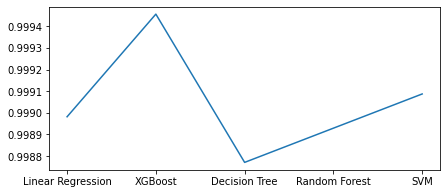

In [159]:
plt.figure(figsize=(7,3))
plt.plot(summary_df["Model"],summary_df["Accuracy"])
plt.show()

#### Model 6  - KNN

In [512]:
# Takes a lot of time for training & also hyper paramter tuning. So most likely in real time this should not be used unless we have a good copute power. 
# However added this as a separate notebook

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 10


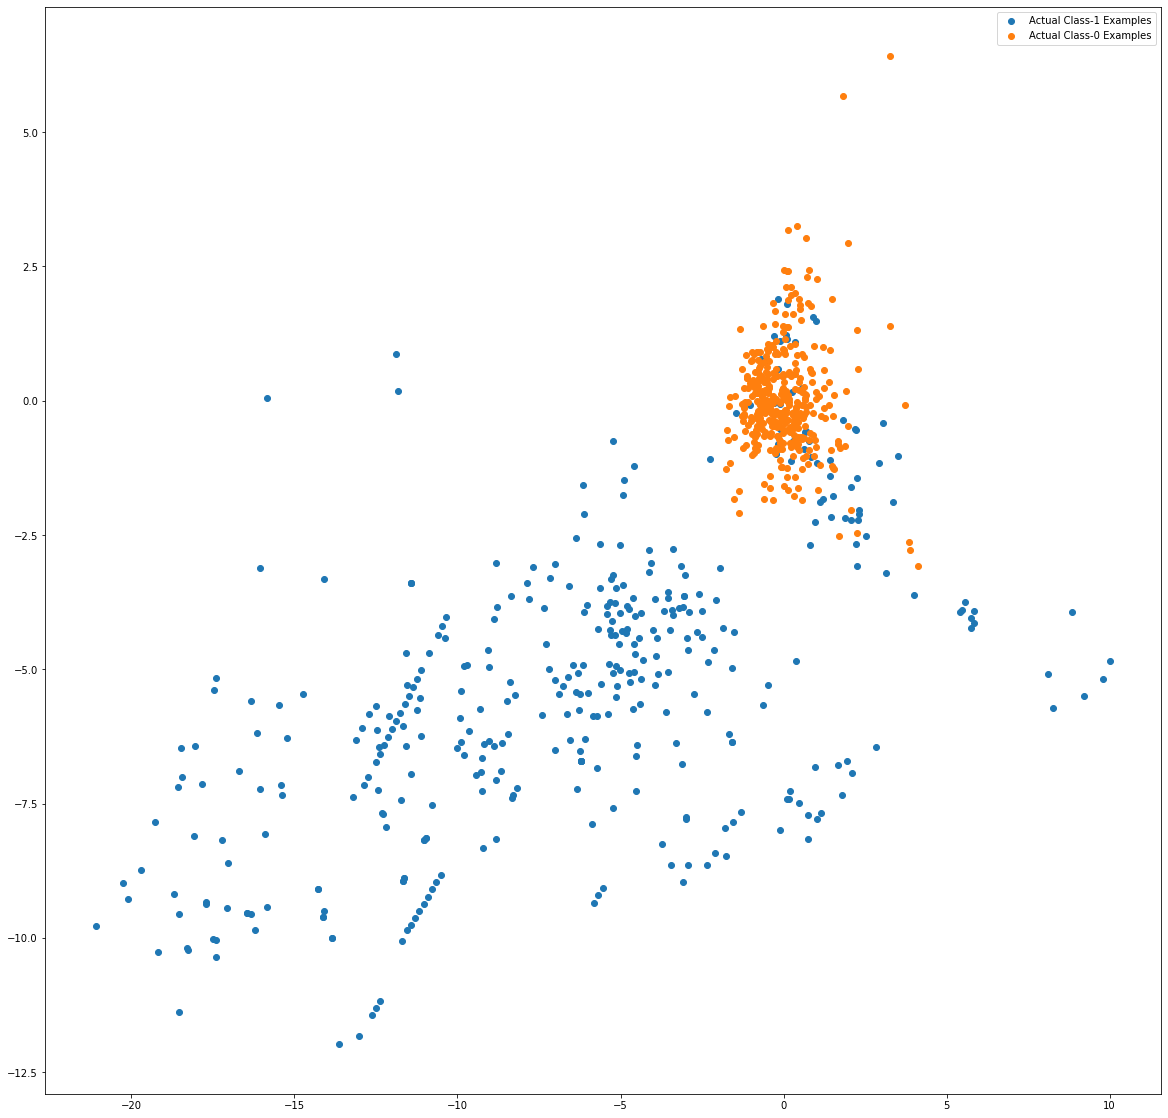

In [168]:
var_imp = []
for i in model_xg.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(model_xg.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(model_xg.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(model_xg.feature_importances_)[-3])+1)

#Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(model_xg.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(model_xg.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [171]:
#print('Train auc =', model_xg.metrics.roc_auc_score(_________)
#fpr, tpr, thresholds = model_xg.metrics.roc_curve(_________)
#threshold = thresholds[np.argmax(tpr-fpr)]
#print(threshold)

##### 5. Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

### Random Oversampling

In [172]:
!pip install imblearn

In [173]:
from imblearn.over_sampling import RandomOverSampler

In [174]:
ros = RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [175]:
from collections import Counter
print('Imbalanced class',Counter(y_train))
print('Balanced class',Counter(y_train_ros))

Imbalanced class Counter({0: 227449, 1: 396})
Balanced class Counter({0: 227449, 1: 227449})


#### Model 7  - Logistic Regression with Random Oversampling

In [176]:
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# choosing different values of C as a regulaization hyperparameter, the higher the value of C, lesser the regularization
params = {"C": [0.01, 0.1, 1, 10, 100]}

model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

model_cv.fit(X_train_ros, y_train_ros)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [177]:
# Best value of C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9885072764236649 at C = 10


In [178]:
lr_cb = LogisticRegression(C=10)

In [179]:
model_lr_cb = lr_cb.fit(X_train_ros, y_train_ros)

In [180]:
y_train__ros_pred = model_lr_cb.predict(X_train_ros)

In [181]:
confusion_matrix = metrics.confusion_matrix(y_train_ros, y_train__ros_pred)
print(confusion_matrix)

[[222182   5267]
 [ 17930 209519]]


In [182]:
TP = confusion_matrix[1,1] # true positives 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [183]:
# Accuracy
auccuracy = metrics.accuracy_score(y_train_ros, y_train__ros_pred)
print("Accuracy:", auccuracy)

# Sensitivity
sensitivity = TP / float(TP+FN)
print("Sensitivity",sensitivity)

# Specificity
specificity =  TN / float(TN+FP)                          
print("Specificity",specificity )

# F1 score
f1_score_train = f1_score(y_train_ros, y_train__ros_pred)
print("F1-Score:",f1_score_train )

Accuracy: 0.9490061508294168
Sensitivity 0.9211691412140743
Specificity 0.976843160444759
F1-Score: 0.9475459879928093


In [184]:
y_train__ros_predict_proba = model_lr_cb.predict_proba(X_train_ros)[:,1]

In [185]:
auc = roc_auc_score(y_train_ros, y_train__ros_predict_proba)

In [186]:
print(auc)

0.9885212258983844


In [187]:
y_test_pred = model_lr_cb.predict(X_test)

In [188]:
# Confusion matrix
confusion_matrix_test = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion_matrix_test)

[[55522  1344]
 [   11    85]]


In [189]:
TP = confusion_matrix_test[1,1] # true positive 
TN = confusion_matrix_test[0,0] # true negatives
FP = confusion_matrix_test[0,1] # false positives
FN = confusion_matrix_test[1,0] # false negatives

In [190]:
# Accuracy
auccuracy = metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy:", auccuracy)

# Sensitivity
sensitivity = TP / float(TP+FN)
print("Sensitivity",sensitivity)

# Specificity
specificity =  TN / float(TN+FP)                          
print("Specificity",specificity )

# F1 score
f1_score_test = f1_score(y_test, y_test_pred)
print("F1-Score:",f1_score_test )

#Precision = TP/(TP+FP)
precision = TP/float(TP+FP)
print("Precision",precision )

Accuracy: 0.9762122116498718
Sensitivity 0.8854166666666666
Specificity 0.9763654908029402
F1-Score: 0.11147540983606558
Precision 0.05948215535339398


In [191]:
y_test_predict_proba = model1.predict_proba(X_test)[:,1]

In [192]:
auc_score = roc_auc_score(y_test, y_test_predict_proba)
print (auc_score)

0.9668121475632775


In [193]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_predict_proba)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Threshold= 0.0011162805816207655


In [194]:
dict1 = {'Model':'Logistic Regression', 'Class':'Balanced - ROS', 'Accuracy':auccuracy, 'Sensitivity':sensitivity, 'Specificity':specificity, 'F1-Score':f1_score_test, 'AUC-ROC':auc_score, 'Precision':precision, 'FPR':fpr, 'TPR':tpr, 'Threshold':threshold}

In [195]:
summary_df = summary_df.append(dict1, ignore_index = True)

In [196]:
summary_df.head(6)

,Model,Class,Accuracy,Sensitivity,Specificity,F1-Score,AUC-ROC,Precision,FPR,TPR,Threshold
0,Linear Regression,Imbalanced,0.998982,0.562500,0.999719,0.768778,0.966812,0.771429,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.1145833333333333...",0.001116
1,XGBoost,Imbalanced,0.999456,0.750000,0.999877,0.822857,0.978537,0.911392,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.4166666666666667...",0.000074
2,Decision Tree,Imbalanced,0.998771,0.583333,0.999472,0.615385,0.921750,0.651163,"[0.0, 3.517040059086273e-05, 0.000211022403545...","[0.0, 0.25, 0.4270833333333333, 0.583333333333...",0.002184
3,Random Forest,Imbalanced,0.998929,0.635417,0.999543,0.666667,0.967234,0.701149,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.1354166666666666...",0.000329
4,SVM,Imbalanced,0.999087,0.697917,0.999596,0.720430,0.967234,0.744444,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.1354166666666666...",0.000329
5,Logistic Regression,Balanced - ROS,0.976212,0.885417,0.976365,0.111475,0.966812,0.059482,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.1145833333333333...",0.001116


#### Model 8  - XGBoost with Random Oversampling

In [197]:
folds = 2

In [198]:
#Hyperparameter Tuning
params = {'learning_rate': [0.2, 0.6],'subsample': [0.3, 0.6]}
xgb_model = XGBClassifier(max_depth=2, n_estimators=100)
model_cross_validation = GridSearchCV(estimator = xgb_model,param_grid = params, scoring= 'roc_auc', cv = folds, verbose = 1, return_train_score=True)

In [199]:
model_cross_validation.fit(X_train_ros, y_train_ros) 

Fitting 2 folds for each of 4 candidates, totalling 8 fits


C:\Users\dibas\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:00:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\dibas\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:01:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\dibas\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:01:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\dibas\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:01:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\dibas\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:01:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\dibas\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:01:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\dibas\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:01:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\dibas\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:01:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\dibas\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:01:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=No

In [200]:
results = pd.DataFrame(model_cross_validation.cv_results_)

In [201]:
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,6.135638,0.249506,0.146134,0.005145,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999689,0.999730,0.999709,2.016987e-05,3,0.999742,0.999711,0.999727,0.000015
1,8.195113,0.525493,0.127732,0.005010,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999693,0.999691,0.999692,9.535491e-07,4,0.999735,0.999679,0.999707,0.000028
2,6.087643,0.129305,0.135810,0.005068,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999928,0.999952,0.999940,1.221664e-05,2,0.999957,0.999972,0.999965,0.000008
3,7.836010,0.065708,0.145939,0.005078,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999956,0.999935,0.999946,1.036386e-05,1,0.999976,0.999954,0.999965,0.000011


In [202]:
model_cross_validation.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [203]:
params = {'learning_rate': 0.6, 'max_depth': 2, 'n_estimators':100, 'subsample':0.3, 'objective':'binary:logistic'}

In [204]:
model_xg_ros = XGBClassifier(params = params)
model_xg_ros.fit(X_train, y_train)

C:\Users\dibas\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:02:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:02:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 100,
                      'objective': 'binary:logistic', 'subsample': 0.3},
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [205]:
y_train__ros_pred = model_xg.predict(X_train_ros)

In [206]:
confusion_matrix = metrics.confusion_matrix(y_train_ros, y_train__ros_pred)
print(confusion_matrix)

[[227449      0]
 [     0 227449]]


In [207]:
TP = confusion_matrix[1,1] # true positives 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [208]:
# Accuracy
auccuracy = metrics.accuracy_score(y_train_ros, y_train__ros_pred)
print("Accuracy:", auccuracy)

# Sensitivity
sensitivity = TP / float(TP+FN)
print("Sensitivity",sensitivity)

# Specificity
specificity =  TN / float(TN+FP)                          
print("Specificity",specificity )

# F1 score
f1_score_train = f1_score(y_train_ros, y_train__ros_pred)
print("F1-Score:",f1_score_train)

Accuracy: 1.0
Sensitivity 1.0
Specificity 1.0
F1-Score: 1.0


In [209]:
y_test_pred = model_xg.predict(X_test)

In [210]:
confusion_matrix_test = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion_matrix_test)

[[56859     7]
 [   24    72]]


In [211]:
TP = confusion_matrix_test[1,1] # true positives 
TN = confusion_matrix_test[0,0] # true negatives
FP = confusion_matrix_test[0,1] # false positives
FN = confusion_matrix_test[1,0] # false negatives

In [212]:
# Accuracy
auccuracy = metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy:", auccuracy)

# Sensitivity
sensitivity = TP / float(TP+FN)
print("Sensitivity",sensitivity)

# Specificity
specificity =  TN / float(TN+FP)                          
print("Specificity",specificity )

# F1 score
f1_score_test = f1_score(y_test, y_test_pred)
print("F1-Score:",f1_score_test) 

#Precision = TP/(TP+FP)
precision = TP/float(TP+FP)
print("Precision",precision )

Accuracy: 0.9994557775359011
Sensitivity 0.75
Specificity 0.999876903597932
F1-Score: 0.8228571428571428
Precision 0.9113924050632911


In [213]:
y_test_pred_proba = model_xg_ros.predict_proba(X_test)[:,1]

In [214]:
auc_score = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc_score

0.9785370798602564

In [215]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred_proba)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Threshold= 7.432205e-05


In [216]:
dict = {'Model':'XGBoost', 'Class':'Balanced - ROS', 'Accuracy':auccuracy, 'Sensitivity':sensitivity, 'Specificity':specificity, 'F1-Score':f1_score_test, 'AUC-ROC':auc_score, 'Precision':precision, 'FPR':fpr, 'TPR':tpr, 'Threshold':threshold }

In [217]:
summary_df = summary_df.append(dict, ignore_index = True)

In [218]:
summary_df.head(10)

,Model,Class,Accuracy,Sensitivity,Specificity,F1-Score,AUC-ROC,Precision,FPR,TPR,Threshold
0,Linear Regression,Imbalanced,0.998982,0.562500,0.999719,0.768778,0.966812,0.771429,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.1145833333333333...",0.001116
1,XGBoost,Imbalanced,0.999456,0.750000,0.999877,0.822857,0.978537,0.911392,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.4166666666666667...",0.000074
2,Decision Tree,Imbalanced,0.998771,0.583333,0.999472,0.615385,0.921750,0.651163,"[0.0, 3.517040059086273e-05, 0.000211022403545...","[0.0, 0.25, 0.4270833333333333, 0.583333333333...",0.002184
3,Random Forest,Imbalanced,0.998929,0.635417,0.999543,0.666667,0.967234,0.701149,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.1354166666666666...",0.000329
4,SVM,Imbalanced,0.999087,0.697917,0.999596,0.720430,0.967234,0.744444,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.1354166666666666...",0.000329
5,Logistic Regression,Balanced - ROS,0.976212,0.885417,0.976365,0.111475,0.966812,0.059482,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.1145833333333333...",0.001116
6,XGBoost,Balanced - ROS,0.999456,0.750000,0.999877,0.822857,0.978537,0.911392,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.4166666666666667...",0.000074


In [219]:
#summary_df[summary_df.duplicated()] # did as added one row twice dict & dict1

In [220]:
#summary_df.drop_duplicates(keep=False, inplace=True)

In [221]:
#dict = {'Model':'Logistic Regression', 'Class':'Balanced - ROS', 'Accuracy':0.97623, 'Sensitivity':0.885417, 'Specificity':0.976383, 'F1-Score':0.111549, 'AUC-ROC':0.966812, 'Precision':0.059524}

In [222]:
#summary_df = summary_df.append(dict, ignore_index = True)

#### Model - 9  Decision Tree with Random Oversampling

In [223]:
params = {'max_depth': range(5, 15, 5), 'min_samples_leaf': range(50, 150, 50),'min_samples_split': range(50, 150, 50)}

dec_tree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dec_tree, param_grid = params, scoring= 'roc_auc', cv = 3,verbose = 1)
grid_search.fit(X_train_ros,y_train_ros)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [224]:
print("Best ROC", grid_search.best_score_)
print(grid_search.best_estimator_)

Best ROC 0.9996327977000883
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


In [225]:
model_dt_ros = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=5, min_samples_leaf=50, min_samples_split=50)

In [226]:
model_dt_ros.fit(X_train_ros, y_train_ros)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [227]:
y_train_ros_pred = model_dt_ros.predict(X_train_ros)

In [228]:
confusion_matrix_train = metrics.confusion_matrix(y_train_ros, y_train_ros)
print(confusion_matrix_train)

[[227449      0]
 [     0 227449]]


In [229]:
TP = confusion_matrix_train[1,1] # true positives 
TN = confusion_matrix_train[0,0] # true negatives
FP = confusion_matrix_train[0,1] # false positives
FN = confusion_matrix_train[1,0] # false negatives

In [230]:
# Accuracy
auccuracy = metrics.accuracy_score(y_train, y_train_pred)
print("Accuracy:", auccuracy)

# Sensitivity
sensitivity = TP / float(TP+FN)
print("Sensitivity",sensitivity)

# Specificity
specificity =  TN / float(TN+FP)                          
print("Specificity",specificity )

# F1 score
f1_score_train = f1_score(y_train, y_train_pred)
print("F1-Score:",f1_score_train)

Accuracy: 0.9993241019113871
Sensitivity 1.0
Specificity 1.0
F1-Score: 0.7930107526881721


In [231]:
y_train_pred_rs_proba = model_dt_ros.predict_proba(X_train_ros)[:,1]
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_rs_proba)
auc

0.9901151977079712

In [232]:
y_test_pred = model_dt_ros.predict(X_test)

In [233]:
confusion_matrix_test = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion_matrix_test)

[[55813  1053]
 [   18    78]]


In [234]:
TP = confusion_matrix_test[1,1] # true positives 
TN = confusion_matrix_test[0,0] # true negatives
FP = confusion_matrix_test[0,1] # false positives
FN = confusion_matrix_test[1,0] # false negatives

In [235]:
# Accuracy
auccuracy = metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy:", auccuracy)

# Sensitivity
sensitivity = TP / float(TP+FN)
print("Sensitivity",sensitivity)

# Specificity
specificity =  TN / float(TN+FP)                          
print("Specificity",specificity )

# F1 score
f1_score_test = f1_score(y_test, y_test_pred)
print("F1-Score:",f1_score_test)

#Precision = TP/(TP+FP)
precision = TP/float(TP+FP)
print("Precision",precision )

Accuracy: 0.9811979916435518
Sensitivity 0.8125
Specificity 0.9814827840889108
F1-Score: 0.1271393643031785
Precision 0.06896551724137931


In [236]:
y_test_pred_proba = model_dt_ros.predict_proba(X_test)[:,1]
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.8934358843597229

In [237]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred_proba)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Threshold= 0.39660547280914443


In [238]:
dict = {'Model':'Decision Tree', 'Class':'Balanced - ROS', 'Accuracy':auccuracy, 'Sensitivity':sensitivity, 'Specificity':specificity, 'F1-Score':f1_score_test, 'AUC-ROC':auc, 'Precision':precision, 'FPR':fpr, 'TPR':tpr, 'Threshold':threshold }


In [239]:
summary_df = summary_df.append(dict, ignore_index = True)

In [240]:
summary_df.head(10)

,Model,Class,Accuracy,Sensitivity,Specificity,F1-Score,AUC-ROC,Precision,FPR,TPR,Threshold
0,Linear Regression,Imbalanced,0.998982,0.562500,0.999719,0.768778,0.966812,0.771429,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.1145833333333333...",0.001116
1,XGBoost,Imbalanced,0.999456,0.750000,0.999877,0.822857,0.978537,0.911392,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.4166666666666667...",0.000074
2,Decision Tree,Imbalanced,0.998771,0.583333,0.999472,0.615385,0.921750,0.651163,"[0.0, 3.517040059086273e-05, 0.000211022403545...","[0.0, 0.25, 0.4270833333333333, 0.583333333333...",0.002184
3,Random Forest,Imbalanced,0.998929,0.635417,0.999543,0.666667,0.967234,0.701149,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.1354166666666666...",0.000329
4,SVM,Imbalanced,0.999087,0.697917,0.999596,0.720430,0.967234,0.744444,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.1354166666666666...",0.000329
5,Logistic Regression,Balanced - ROS,0.976212,0.885417,0.976365,0.111475,0.966812,0.059482,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.1145833333333333...",0.001116
6,XGBoost,Balanced - ROS,0.999456,0.750000,0.999877,0.822857,0.978537,0.911392,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.4166666666666667...",0.000074
7,Decision Tree,Balanced - ROS,0.981198,0.812500,0.981483,0.127139,0.893436,0.068966,"[0.0, 0.0007034080118172546, 0.001529912425702...","[0.0, 0.7395833333333334, 0.7708333333333334, ...",0.396605


#### Model 10 - Random Forest

In [241]:
params = {'max_depth': range(5, 15, 5), 'min_samples_leaf': range(50, 150, 50),'min_samples_split': range(50, 150, 50), 'n_estimators': [100,200,300], 'max_features': [10, 15]}

rand_forest = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rand_forest, param_grid = params, n_jobs = -1, cv = 2,verbose = 1, return_train_score=True)
grid_search.fit(X_train_ros,y_train_ros)

Fitting 2 folds for each of 48 candidates, totalling 96 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5), 'max_features': [10, 15],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [242]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.9968740245065927
{'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 200}


In [243]:
model_rf_ros = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=15,
                             n_estimators=100)

In [244]:
model_rf_ros.fit(X_train_ros, y_train_ros)

RandomForestClassifier(max_depth=5, max_features=15, min_samples_leaf=50,
                       min_samples_split=100)

In [245]:
y_train_ros_pred = model_rf_ros.predict(X_train_ros)

In [246]:
confusion_matrix_train = metrics.confusion_matrix(y_train_ros, y_train_ros)
print(confusion_matrix_train)

[[227449      0]
 [     0 227449]]


In [247]:
TP = confusion_matrix_train[1,1] # true positives 
TN = confusion_matrix_train[0,0] # true negatives
FP = confusion_matrix_train[0,1] # false positives
FN = confusion_matrix_train[1,0] # false negatives

In [248]:
# Accuracy
auccuracy = metrics.accuracy_score(y_train, y_train_pred)
print("Accuracy:", auccuracy)

# Sensitivity
sensitivity = TP / float(TP+FN)
print("Sensitivity",sensitivity)

# Specificity
specificity =  TN / float(TN+FP)                          
print("Specificity",specificity )

# F1 score
f1_score_train = f1_score(y_train, y_train_pred)
print("F1-Score:",f1_score_train) 

Accuracy: 0.9993241019113871
Sensitivity 1.0
Specificity 1.0
F1-Score: 0.7930107526881721


In [249]:
y_train_pred_ros_proba = model_rf_ros.predict_proba(X_train_ros)[:,1]

In [250]:
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_ros_proba)
auc

0.994072906889907

In [251]:
y_test_pred = model_rf_ros.predict(X_test)

In [252]:
confusion_matrix_test = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion_matrix_test)

[[56615   251]
 [   18    78]]


In [253]:
TP = confusion_matrix_test[1,1] # true positives 
TN = confusion_matrix_test[0,0] # true negatives
FP = confusion_matrix_test[0,1] # false positives
FN = confusion_matrix_test[1,0] # false negatives

In [254]:
# Accuracy
auccuracy = metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy:", auccuracy)

# Sensitivity
sensitivity = TP / float(TP+FN)
print("Sensitivity",sensitivity)

# Specificity
specificity =  TN / float(TN+FP)                          
print("Specificity",specificity )

# F1 score
f1_score_test = f1_score(y_test, y_test_pred)
print("F1-Score:",f1_score_test) 

#Precision = TP/(TP+FP)
precision = TP/float(TP+FP)
print("Precision",precision )

Accuracy: 0.9952775534566904
Sensitivity 0.8125
Specificity 0.9955861147258467
F1-Score: 0.3670588235294117
Precision 0.23708206686930092


In [255]:
y_test_pred_proba = model_rf_ros.predict_proba(X_test)[:,1]

In [256]:
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9781777739188033

In [257]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred_proba)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Threshold= 0.13715549915356814


In [258]:
dict = {'Model':'Random Forest', 'Class':'Balanced - ROS', 'Accuracy':auccuracy, 'Sensitivity':sensitivity, 'Specificity':specificity, 'F1-Score':f1_score_test, 'AUC-ROC':auc, 'Precision':precision, 'FPR':fpr, 'TPR':tpr, 'Threshold':threshold }

In [259]:
summary_df = summary_df.append(dict, ignore_index = True)

In [260]:
summary_df.head(10)

,Model,Class,Accuracy,Sensitivity,Specificity,F1-Score,AUC-ROC,Precision,FPR,TPR,Threshold
0,Linear Regression,Imbalanced,0.998982,0.562500,0.999719,0.768778,0.966812,0.771429,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.1145833333333333...",0.001116
1,XGBoost,Imbalanced,0.999456,0.750000,0.999877,0.822857,0.978537,0.911392,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.4166666666666667...",0.000074
2,Decision Tree,Imbalanced,0.998771,0.583333,0.999472,0.615385,0.921750,0.651163,"[0.0, 3.517040059086273e-05, 0.000211022403545...","[0.0, 0.25, 0.4270833333333333, 0.583333333333...",0.002184
3,Random Forest,Imbalanced,0.998929,0.635417,0.999543,0.666667,0.967234,0.701149,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.1354166666666666...",0.000329
4,SVM,Imbalanced,0.999087,0.697917,0.999596,0.720430,0.967234,0.744444,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.1354166666666666...",0.000329
5,Logistic Regression,Balanced - ROS,0.976212,0.885417,0.976365,0.111475,0.966812,0.059482,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.1145833333333333...",0.001116
6,XGBoost,Balanced - ROS,0.999456,0.750000,0.999877,0.822857,0.978537,0.911392,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.4166666666666667...",0.000074
7,Decision Tree,Balanced - ROS,0.981198,0.812500,0.981483,0.127139,0.893436,0.068966,"[0.0, 0.0007034080118172546, 0.001529912425702...","[0.0, 0.7395833333333334, 0.7708333333333334, ...",0.396605
8,Random Forest,Balanced - ROS,0.995278,0.812500,0.995586,0.367059,0.978178,0.237082,"[0.0, 0.0, 0.0, 0.0002637780044314705, 0.00028...","[0.0, 0.020833333333333332, 0.0416666666666666...",0.137155


#### Model 11 - SVM with ROS

In [514]:
# Takes a lot of time for training & also hyper paramter tuning. So most likely in real time this should not be used unless we have a good copute power. 
# However added this as a separate notebook.

#### Model 12 - KNN with ROS

In [513]:
# Takes a lot of time for training & also hyper paramter tuning. So most likely in real time this should not be used unless we have a good copute power. 
# However added this as a separate notebook.

### SMOTE

### Print the class distribution after applying SMOTE 

In [265]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]




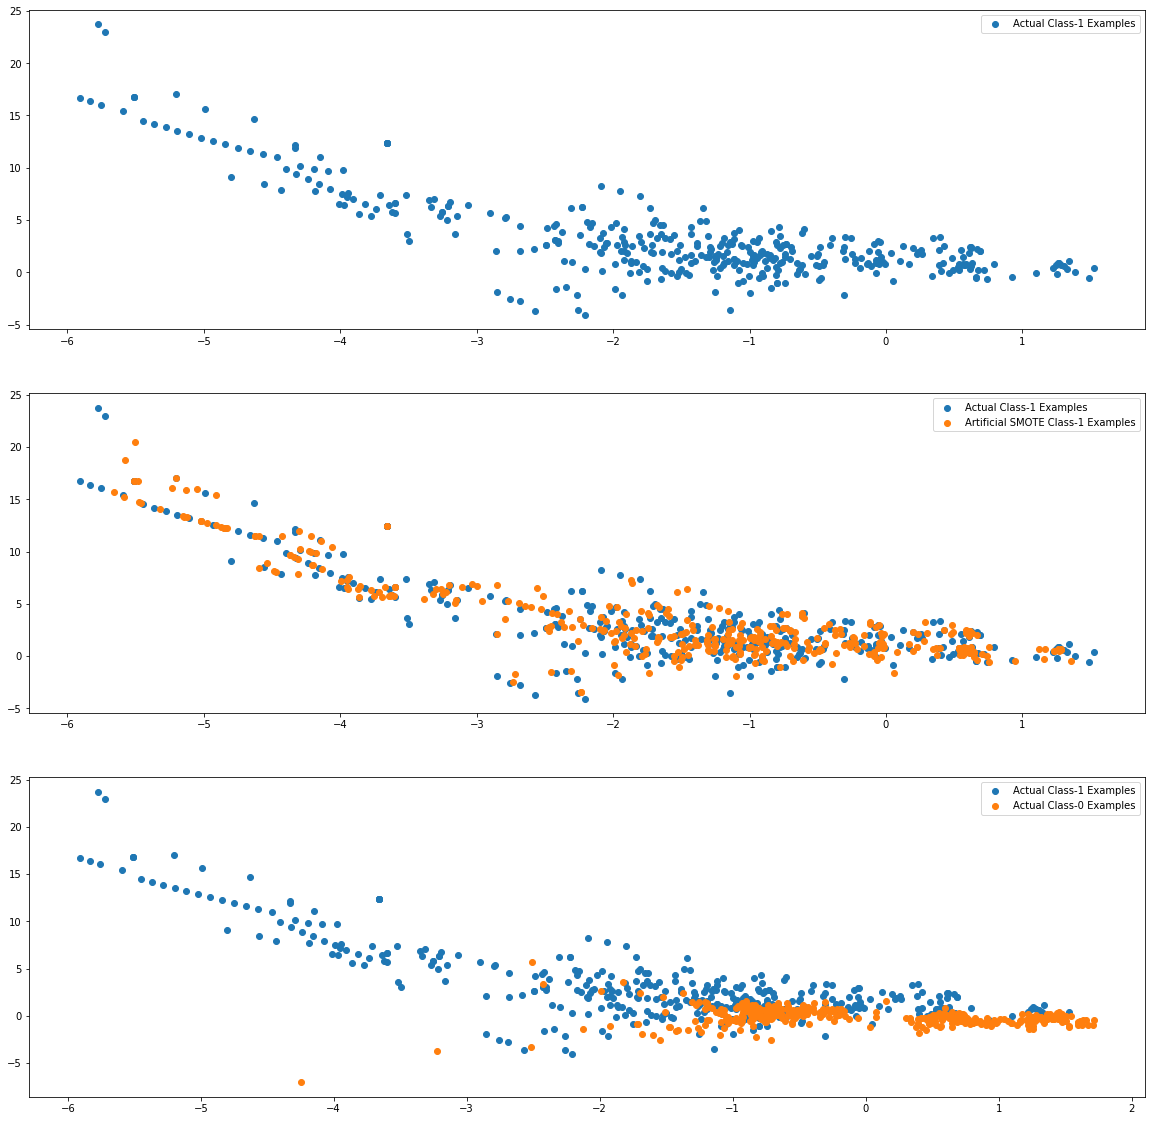

In [266]:
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

#### Model - 13 - Logistic Regression with SMOTE

In [267]:
# Use k-fold cross validation to choose the optimal C, then build the final LR model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [268]:
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# choosing different values of C as a regulaization hyperparameter, the higher the value of C, lesser the regularization
params = {"C": [0.01, 0.1, 1, 10, 100]}

model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

In [269]:
model_cv.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [270]:
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9898775448523125 at C = 10


In [271]:
lr_smote = LogisticRegression(C=10)

In [272]:
model_lr_smote = lr_smote.fit(X_train_smote, y_train_smote)

In [273]:
y_train_pred_smote = model_lr_smote.predict(X_train_smote)

In [274]:
confusion_matrix = metrics.confusion_matrix(y_train_smote, y_train_pred_smote)
print(confusion_matrix)

[[221953   5496]
 [ 17575 209874]]


In [275]:
TP = confusion_matrix[1,1] # true positives 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [276]:
# Accuracy
auccuracy = metrics.accuracy_score(y_train_smote, y_train_pred_smote)
print("Accuracy:", auccuracy)

# Sensitivity
sensitivity = TP / float(TP+FN)
print("Sensitivity",sensitivity)

# Specificity
specificity =  TN / float(TN+FP)                          
print("Specificity",specificity )

# F1 score
f1_score_train = f1_score(y_train_smote, y_train_pred_smote)
print("F1-Score:",f1_score_train )

Accuracy: 0.9492831359997186
Sensitivity 0.9227299306657756
Specificity 0.9758363413336616
F1-Score: 0.9478997062005018


In [277]:
y_train_predict_proba_smote = model_lr_smote.predict_proba(X_train_smote)[:,1]

In [278]:
from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(y_train_smote, y_train_predict_proba_smote)

In [279]:
print(auc_score)

0.989888476249563


In [280]:
y_test_pred = model_lr_smote.predict(X_test)

In [281]:
confusion_matrix_test = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion_matrix_test)

[[55438  1428]
 [   10    86]]


In [282]:
TP = confusion_matrix_test[1,1] # true positives 
TN = confusion_matrix_test[0,0] # true negatives
FP = confusion_matrix_test[0,1] # false positives
FN = confusion_matrix_test[1,0] # false negatives

In [283]:
# Accuracy
auccuracy = metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy:", auccuracy)

# Sensitivity
sensitivity = TP / float(TP+FN)
print("Sensitivity",sensitivity)

# Specificity
specificity =  TN / float(TN+FP)                          
print("Specificity",specificity )

# F1 score
f1_score_test = f1_score(y_test, y_test_pred)
print("F1-Score:",f1_score_test )

#Precision = TP/(TP+FP)
precision = TP/float(TP+FP)
print("Precision",precision )

Accuracy: 0.9747550998911555
Sensitivity 0.8958333333333334
Specificity 0.974888333978124
F1-Score: 0.10683229813664598
Precision 0.05680317040951123


In [284]:
y_test_predict_proba = model_lr_smote.predict_proba(X_test)[:,1]

In [285]:
auc_score = roc_auc_score(y_test, y_test_predict_proba)
print (auc_score)

0.9700686152534027


In [286]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_predict_proba)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Threshold= 0.3898492581581451


In [287]:
dict = {'Model':'Logistic Regression', 'Class':'Balanced - SMOTE',  'Accuracy':auccuracy, 'Sensitivity':sensitivity, 'Specificity':specificity, 'F1-Score':f1_score_train, 'AUC-ROC':auc_score, 'Precision':precision, 'FPR':fpr, 'TPR':tpr, 'Threshold':threshold}

In [288]:
summary_df = summary_df.append(dict, ignore_index = True)

In [289]:
summary_df.head()

,Model,Class,Accuracy,Sensitivity,Specificity,F1-Score,AUC-ROC,Precision,FPR,TPR,Threshold
0,Linear Regression,Imbalanced,0.998982,0.562500,0.999719,0.768778,0.966812,0.771429,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.1145833333333333...",0.001116
1,XGBoost,Imbalanced,0.999456,0.750000,0.999877,0.822857,0.978537,0.911392,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.4166666666666667...",0.000074
2,Decision Tree,Imbalanced,0.998771,0.583333,0.999472,0.615385,0.921750,0.651163,"[0.0, 3.517040059086273e-05, 0.000211022403545...","[0.0, 0.25, 0.4270833333333333, 0.583333333333...",0.002184
3,Random Forest,Imbalanced,0.998929,0.635417,0.999543,0.666667,0.967234,0.701149,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.1354166666666666...",0.000329
4,SVM,Imbalanced,0.999087,0.697917,0.999596,0.720430,0.967234,0.744444,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.1354166666666666...",0.000329


#### Model - 14 - XGBoostwith SMOTE

In [290]:
from xgboost import XGBClassifier

In [291]:
folds = 2

In [292]:
params = {'learning_rate': [0.2, 0.6],'subsample': [0.3, 0.6]}
xgb_model = XGBClassifier(max_depth=2, n_estimators=100)
model_cross_validation = GridSearchCV(estimator = xgb_model,param_grid = params, scoring= 'roc_auc', cv = folds, verbose = 1, return_train_score=True)       

In [293]:
model_cross_validation.fit(X_train_smote, y_train_smote)  

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[23:57:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:57:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:57:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:57:19] 

GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=No

In [294]:
model_cross_validation.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [295]:
params = {'learning_rate': 0.6, 'ax_depth': 2, 'n_estimators':100, 'subsample':0.6, 'objective':'binary:logistic'}

In [296]:
model_xg_smote = XGBClassifier(params = params)
model_xg_smote.fit(X_train_smote, y_train_smote)

[23:57:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:57:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1,
              params={'ax_depth': 2, 'learning_rate': 0.6, 'n_estimators': 100,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [297]:
y_train_pred_smote = model_xg_smote.predict(X_train_smote)

In [298]:
confusion_matrix = metrics.confusion_matrix(y_train_smote, y_train_pred_smote)
print(confusion_matrix)

[[227448      1]
 [     0 227449]]


In [299]:
TP = confusion_matrix[1,1] # true positives 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [300]:
# Accuracy
auccuracy = metrics.accuracy_score(y_train_smote, y_train_pred_smote)
print("Accuracy:", auccuracy)

# Sensitivity
sensitivity = TP / float(TP+FN)
print("Sensitivity",sensitivity)

# Specificity
specificity =  TN / float(TN+FP)                          
print("Specificity",specificity )

# F1 score
f1_score_train = f1_score(y_train_smote, y_train_pred_smote)
print("F1-Score:",f1_score_train)

Accuracy: 0.9999978017049976
Sensitivity 1.0
Specificity 0.9999956034099952
F1-Score: 0.9999978017098301


In [301]:
y_test_pred = model_xg_smote.predict(X_test)

In [302]:
confusion_matrix_test = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion_matrix_test)

[[56836    30]
 [   21    75]]


In [303]:
TP = confusion_matrix_test[1,1] # true positives 
TN = confusion_matrix_test[0,0] # true negatives
FP = confusion_matrix_test[0,1] # false positives
FN = confusion_matrix_test[1,0] # false negatives

In [304]:
# Accuracy
auccuracy = metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy:", auccuracy)

# Sensitivity
sensitivity = TP / float(TP+FN)
print("Sensitivity",sensitivity)

# Specificity
specificity =  TN / float(TN+FP)                          
print("Specificity",specificity )

# F1 score
f1_score_test = f1_score(y_test, y_test_pred)
print("F1-Score:",f1_score_test) 

#Precision = TP/(TP+FP)
precision = TP/float(TP+FP)
print("Precision",precision )

Accuracy: 0.9991046662687406
Sensitivity 0.78125
Specificity 0.9994724439911371
F1-Score: 0.7462686567164178
Precision 0.7142857142857143


In [305]:
y_test_pred_proba = model_xg_smote.predict_proba(X_test)[:,1]

In [306]:
auc_score = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc_score

0.9595715329312183

In [307]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred_proba)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Threshold= 0.00030486053


In [308]:
dict = {'Model':'XGBoost', 'Class':'Balanced - SMOTE', 'Accuracy':auccuracy, 'Sensitivity':sensitivity, 'Specificity':specificity, 'F1-Score':f1_score_test, 'AUC-ROC':auc_score, 'Precision':precision, 'FPR':fpr, 'TPR':tpr, 'Threshold':threshold}


In [309]:
summary_df = summary_df.append(dict, ignore_index = True)

In [310]:
summary_df.head()

,Model,Class,Accuracy,Sensitivity,Specificity,F1-Score,AUC-ROC,Precision,FPR,TPR,Threshold
0,Linear Regression,Imbalanced,0.998982,0.562500,0.999719,0.768778,0.966812,0.771429,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.1145833333333333...",0.001116
1,XGBoost,Imbalanced,0.999456,0.750000,0.999877,0.822857,0.978537,0.911392,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.4166666666666667...",0.000074
2,Decision Tree,Imbalanced,0.998771,0.583333,0.999472,0.615385,0.921750,0.651163,"[0.0, 3.517040059086273e-05, 0.000211022403545...","[0.0, 0.25, 0.4270833333333333, 0.583333333333...",0.002184
3,Random Forest,Imbalanced,0.998929,0.635417,0.999543,0.666667,0.967234,0.701149,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.1354166666666666...",0.000329
4,SVM,Imbalanced,0.999087,0.697917,0.999596,0.720430,0.967234,0.744444,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.1354166666666666...",0.000329


#### Model - 15 - Decision tree with SMOTE

In [311]:
from sklearn.tree import DecisionTreeClassifier

In [312]:
params = {'max_depth': range(5, 15, 5), 'min_samples_leaf': range(50, 150, 50),'min_samples_split': range(50, 150, 50)}

dec_tree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dec_tree, param_grid = params, scoring= 'roc_auc', cv = 3,verbose = 1)
grid_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [313]:
cross_validation_results = pd.DataFrame(grid_search.cv_results_)
cross_validation_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,4.428245,0.011844,0.037561,0.003441,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.984816,0.986495,0.984574,0.985295,0.000854,6
1,4.351158,0.027810,0.037568,0.003415,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.984830,0.986484,0.984573,0.985296,0.000847,5
2,4.370713,0.030492,0.041209,0.000345,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.984781,0.986465,0.984500,0.985249,0.000867,7
3,4.386650,0.012803,0.037397,0.004643,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.984778,0.986430,0.984490,0.985233,0.000855,8
4,8.213096,0.033149,0.040278,0.000997,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.997861,0.998326,0.997830,0.998006,0.000227,1
5,8.197330,0.057604,0.038221,0.003837,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.997880,0.998310,0.997818,0.998002,0.000219,2
6,8.189639,0.093679,0.040780,0.000239,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.997785,0.998207,0.997868,0.997953,0.000182,3
7,8.140213,0.019825,0.040261,0.001095,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.997804,0.998109,0.997885,0.997933,0.000129,4


In [314]:
print("Best ROC", grid_search.best_score_)
print(grid_search.best_estimator_)

Best ROC 0.9980057290710604
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [315]:
model_dt_smote = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=5, min_samples_leaf=50, min_samples_split=50)

In [316]:
model_dt_smote.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [317]:
y_train_pred_smote = model_dt_smote.predict(X_train_smote)

In [318]:
confusion_matrix_train = metrics.confusion_matrix(y_train_smote, y_train_smote)
print(confusion_matrix_train)

[[227449      0]
 [     0 227449]]


In [319]:
TP = confusion_matrix_train[1,1] # true positives 
TN = confusion_matrix_train[0,0] # true negatives
FP = confusion_matrix_train[0,1] # false positives
FN = confusion_matrix_train[1,0] # false negatives

In [320]:
# Accuracy
auccuracy = metrics.accuracy_score(y_train_smote, y_train_pred_smote)
print("Accuracy:", auccuracy)

# Sensitivity
sensitivity = TP / float(TP+FN)
print("Sensitivity",sensitivity)

# Specificity
specificity =  TN / float(TN+FP)                          
print("Specificity",specificity )

# F1 score
f1_score_train = f1_score(y_train_smote, y_train_pred_smote)
print("F1-Score:",f1_score_train)

Accuracy: 0.9522354461879367
Sensitivity 1.0
Specificity 1.0
F1-Score: 0.9521913051896902


In [321]:
y_train_pred_proba_smote = model_dt_smote.predict_proba(X_train_smote)[:,1]
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba_smote)
auc

0.9857895692098025

In [322]:
y_test_pred = model_dt_smote.predict(X_test)

In [323]:
confusion_matrix_test = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion_matrix_test)

[[54076  2790]
 [   15    81]]


In [324]:
TP = confusion_matrix_test[1,1] # true positives 
TN = confusion_matrix_test[0,0] # true negatives
FP = confusion_matrix_test[0,1] # false positives
FN = confusion_matrix_test[1,0] # false negatives

In [325]:
# Accuracy
auccuracy = metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy:", auccuracy)

# Sensitivity
sensitivity = TP / float(TP+FN)
print("Sensitivity",sensitivity)

# Specificity
specificity =  TN / float(TN+FP)                          
print("Specificity",specificity )

# F1 score
f1_score_test = f1_score(y_test, y_test_pred)
print("F1-Score:",f1_score_test)

#Precision = TP/(TP+FP)
precision = TP/float(TP+FP)
print("Precision",precision )

Accuracy: 0.950756644780731
Sensitivity 0.84375
Specificity 0.9509372911757465
F1-Score: 0.054600606673407485
Precision 0.02821316614420063


In [326]:
y_test_pred_proba = model_dt_smote.predict_proba(X_test)[:,1]
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9366419887689187

In [327]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred_proba)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Threshold= 0.506195623517005


In [328]:
dict = {'Model':'Decision Tree', 'Class':'Balanced - SMOTE', 'Accuracy':auccuracy, 'Sensitivity':sensitivity, 'Specificity':specificity, 'F1-Score':f1_score_test, 'AUC-ROC':auc, 'Precision':precision, 'FPR':fpr, 'TPR':tpr, 'Threshold':threshold}

In [329]:
summary_df = summary_df.append(dict, ignore_index = True)

In [330]:
summary_df.head()

,Model,Class,Accuracy,Sensitivity,Specificity,F1-Score,AUC-ROC,Precision,FPR,TPR,Threshold
0,Linear Regression,Imbalanced,0.998982,0.562500,0.999719,0.768778,0.966812,0.771429,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.1145833333333333...",0.001116
1,XGBoost,Imbalanced,0.999456,0.750000,0.999877,0.822857,0.978537,0.911392,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.4166666666666667...",0.000074
2,Decision Tree,Imbalanced,0.998771,0.583333,0.999472,0.615385,0.921750,0.651163,"[0.0, 3.517040059086273e-05, 0.000211022403545...","[0.0, 0.25, 0.4270833333333333, 0.583333333333...",0.002184
3,Random Forest,Imbalanced,0.998929,0.635417,0.999543,0.666667,0.967234,0.701149,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.1354166666666666...",0.000329
4,SVM,Imbalanced,0.999087,0.697917,0.999596,0.720430,0.967234,0.744444,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.1354166666666666...",0.000329


#### Model - 16 - Random Forest with SMOTE

In [331]:
from sklearn.ensemble import RandomForestClassifier

In [332]:
params = {'max_depth': range(5, 15, 5), 'min_samples_leaf': range(50, 150, 50),'min_samples_split': range(50, 150, 50), 'n_estimators': [100,200,300], 'max_features': [10, 15]}

rand_forest = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rand_forest, param_grid = params, n_jobs = -1, cv = 2,verbose = 1, return_train_score=True)
grid_search.fit(X_train_smote,y_train_smote)

Fitting 2 folds for each of 48 candidates, totalling 96 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5), 'max_features': [10, 15],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [333]:
#best score
print(grid_search.best_score_)
print(grid_search.best_params_)

0.9913167347405352
{'max_depth': 10, 'max_features': 15, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 100}


In [334]:
model_rf_smote = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=15,
                             n_estimators=300)

In [335]:
model_rf_smote.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=5, max_features=15, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=300)

In [336]:
y_train_pred_smote = model_rf_smote.predict(X_train_smote)

In [337]:
confusion_matrix_train = metrics.confusion_matrix(y_train_smote, y_train_smote)
print(confusion_matrix_train)

[[227449      0]
 [     0 227449]]


In [338]:
TP = confusion_matrix_train[1,1] # true positives 
TN = confusion_matrix_train[0,0] # true negatives
FP = confusion_matrix_train[0,1] # false positives
FN = confusion_matrix_train[1,0] # false negatives

In [339]:
# Accuracy
auccuracy = metrics.accuracy_score(y_train_smote, y_train_pred_smote)
print("Accuracy:", auccuracy)

# Sensitivity
sensitivity = TP / float(TP+FN)
print("Sensitivity",sensitivity)

# Specificity
specificity =  TN / float(TN+FP)                          
print("Specificity",specificity )

# F1 score
f1_score_train = f1_score(y_train_smote, y_train_pred_smote)
print("F1-Score:",f1_score_train)

Accuracy: 0.9551262041160875
Sensitivity 1.0
Specificity 1.0
F1-Score: 0.953256775168592


In [340]:
y_train_pred_proba_smote = model_rf_smote.predict_proba(X_train_smote)[:,1]

In [341]:
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba_smote)
auc

0.992529203624715

In [342]:
y_test_pred = model_rf_smote.predict(X_test)

In [343]:
confusion_matrix_test = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion_matrix_test)

[[56513   353]
 [   18    78]]


In [344]:
TP = confusion_matrix_test[1,1] # true positives 
TN = confusion_matrix_test[0,0] # true negatives
FP = confusion_matrix_test[0,1] # false positives
FN = confusion_matrix_test[1,0] # false negatives

In [345]:
# Accuracy
auccuracy = metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy:", auccuracy)

# Sensitivity
sensitivity = TP / float(TP+FN)
print("Sensitivity",sensitivity)

# Specificity
specificity =  TN / float(TN+FP)                          
print("Specificity",specificity )

# F1 score
f1_score_test = f1_score(y_test, y_test_pred)
print("F1-Score:",f1_score_test) 

#Precision = TP/(TP+FP)
precision = TP/float(TP+FP)
print("Precision",precision )

Accuracy: 0.9934868859941716
Sensitivity 0.8125
Specificity 0.9937924242957127
F1-Score: 0.29601518026565465
Precision 0.18097447795823665


In [346]:
y_test_pred_proba = model_rf_smote.predict_proba(X_test)[:,1]

In [347]:
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9795409017104538

In [348]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred_proba)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Threshold= 0.3182067675056851


In [349]:
dict = {'Model':'Random Forest', 'Class':'Balanced - SMOTE', 'Accuracy':auccuracy, 'Sensitivity':sensitivity, 'Specificity':specificity, 'F1-Score':f1_score_test, 'AUC-ROC':auc, 'Precision':precision, 'FPR':fpr, 'TPR':tpr, 'Threshold':threshold}


In [350]:
summary_df = summary_df.append(dict, ignore_index = True)

In [351]:
summary_df.head()

,Model,Class,Accuracy,Sensitivity,Specificity,F1-Score,AUC-ROC,Precision,FPR,TPR,Threshold
0,Linear Regression,Imbalanced,0.998982,0.562500,0.999719,0.768778,0.966812,0.771429,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.1145833333333333...",0.001116
1,XGBoost,Imbalanced,0.999456,0.750000,0.999877,0.822857,0.978537,0.911392,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.4166666666666667...",0.000074
2,Decision Tree,Imbalanced,0.998771,0.583333,0.999472,0.615385,0.921750,0.651163,"[0.0, 3.517040059086273e-05, 0.000211022403545...","[0.0, 0.25, 0.4270833333333333, 0.583333333333...",0.002184
3,Random Forest,Imbalanced,0.998929,0.635417,0.999543,0.666667,0.967234,0.701149,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.1354166666666666...",0.000329
4,SVM,Imbalanced,0.999087,0.697917,0.999596,0.720430,0.967234,0.744444,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.1354166666666666...",0.000329


#### Model - 17 - SVM with SMOTE

In [515]:
# Takes a lot of time for training & also hyper paramter tuning. So most likely in real time this should not be used unless we have a good copute power. 
# However added this as a separate notebook

#### Model - 18 - KNN with SMOTE

In [516]:
# Takes a lot of time for training & also hyper paramter tuning. So most likely in real time this should not be used unless we have a good copute power. 
# However added this as a separate notebook

### ADASYN

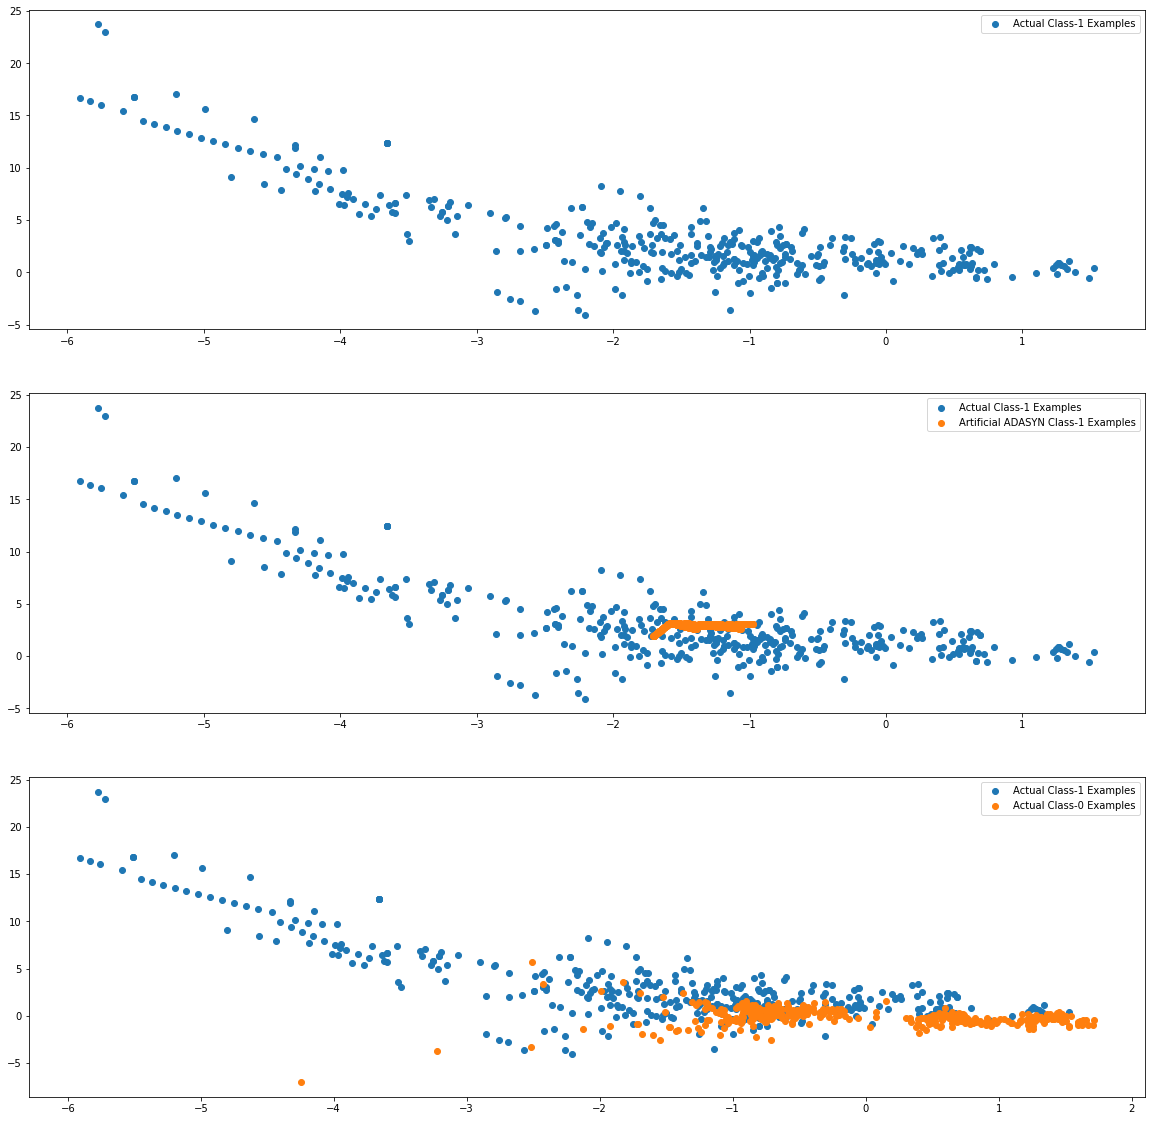

In [357]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [358]:
from imblearn.over_sampling import ADASYN

In [359]:
ada = ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

In [360]:
from collections import Counter
print('Before Class Distribution:-',Counter(y_train))
print('After Class distribution:-',Counter(y_train_adasyn))

Before Class Distribution:- Counter({0: 227449, 1: 396})
After Class distribution:- Counter({0: 227449, 1: 227448})


#### Model - 19 - Logistic Regression with ADASYN

In [361]:
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [362]:
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# choosing different values of C as a regulaization hyperparameter, the higher the value of C, lesser the regularization
params = {"C": [0.01, 0.1, 1, 10, 100]}

model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [363]:
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9631366504006366 at C = 100


In [364]:
logistic_reg = LogisticRegression(C=100)

In [365]:
model_lr_adasyn = logistic_reg.fit(X_train_adasyn, y_train_adasyn)

In [366]:
y_train_pred_adasyn = model_lr_adasyn.predict(X_train_adasyn)

In [367]:
confusion_matrix = metrics.confusion_matrix(y_train_adasyn, y_train_pred_adasyn)
print(confusion_matrix)

[[207019  20430]
 [ 31287 196161]]


In [368]:
TP = confusion_matrix[1,1] # true positives 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [369]:
# Accuracy
auccuracy = metrics.accuracy_score(y_train_adasyn, y_train_pred_adasyn)
print("Accuracy:", auccuracy)

# Sensitivity
sensitivity = TP / float(TP+FN)
print("Sensitivity",sensitivity)

# Specificity
specificity =  TN / float(TN+FP)                          
print("Specificity",specificity )

# F1 score
f1_score_train = f1_score(y_train_adasyn, y_train_pred_adasyn)
print("F1-Score:",f1_score_train )

Accuracy: 0.8863105274380794
Sensitivity 0.86244328373958
Specificity 0.9101776662020936
F1-Score: 0.883530500699263


In [370]:
y_train_predict_proba_adasyn = model_lr_adasyn.predict_proba(X_train_adasyn)[:,1]

In [371]:
from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(y_train_adasyn, y_train_predict_proba_adasyn)

In [372]:
print(auc_score)

0.9631610135132693


In [373]:
y_test_pred = model_lr_adasyn.predict(X_test)

In [374]:
confusion_matrix_test = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion_matrix_test)

[[51642  5224]
 [    4    92]]


In [375]:
TP = confusion_matrix_test[1,1] # true positive 
TN = confusion_matrix_test[0,0] # true negatives
FP = confusion_matrix_test[0,1] # false positives
FN = confusion_matrix_test[1,0] # false negatives

In [376]:
# Accuracy
auccuracy = metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy:", auccuracy)

# Sensitivity
sensitivity = TP / float(TP+FN)
print("Sensitivity",sensitivity)

# Specificity
specificity =  TN / float(TN+FP)                          
print("Specificity",specificity )

# F1 score
f1_score_test = f1_score(y_test, y_test_pred)
print("F1-Score:",f1_score_test )

#Precision = TP/(TP+FP)
precision = TP/float(TP+FP)
print("Precision",precision )

Accuracy: 0.9082195147642288
Sensitivity 0.9583333333333334
Specificity 0.9081349136566665
F1-Score: 0.03399852180339985
Precision 0.01730624529721595


In [377]:
y_test_predict_proba = model_lr_adasyn.predict_proba(X_test)[:,1]

In [378]:
auc_score = roc_auc_score(y_test, y_test_predict_proba)
print (auc_score)

0.9671573487086602


In [379]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_predict_proba)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Threshold= 0.6419785382303841


In [380]:
dict = {'Model':'Linear Regression', 'Class':'Balanced - Adasyn',  'Accuracy':auccuracy, 'Sensitivity':sensitivity, 'Specificity':specificity, 'F1-Score':f1_score_train, 'AUC-ROC':auc_score, 'Precision':precision, 'FPR':fpr, 'TPR':tpr, 'Threshold':threshold}

In [381]:
summary_df.head()

,Model,Class,Accuracy,Sensitivity,Specificity,F1-Score,AUC-ROC,Precision,FPR,TPR,Threshold
0,Linear Regression,Imbalanced,0.998982,0.562500,0.999719,0.768778,0.966812,0.771429,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.1145833333333333...",0.001116
1,XGBoost,Imbalanced,0.999456,0.750000,0.999877,0.822857,0.978537,0.911392,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.4166666666666667...",0.000074
2,Decision Tree,Imbalanced,0.998771,0.583333,0.999472,0.615385,0.921750,0.651163,"[0.0, 3.517040059086273e-05, 0.000211022403545...","[0.0, 0.25, 0.4270833333333333, 0.583333333333...",0.002184
3,Random Forest,Imbalanced,0.998929,0.635417,0.999543,0.666667,0.967234,0.701149,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.1354166666666666...",0.000329
4,SVM,Imbalanced,0.999087,0.697917,0.999596,0.720430,0.967234,0.744444,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.1354166666666666...",0.000329


#### Model - 20 - XGBoost with ADASYN

In [382]:
from xgboost import XGBClassifier

In [383]:
folds = 2

In [384]:
params = {'learning_rate': [0.2, 0.6],'subsample': [0.3, 0.6]}
xgb_model = XGBClassifier(max_depth=2, n_estimators=100)
model_cross_validation = GridSearchCV(estimator = xgb_model,param_grid = params, scoring= 'roc_auc', cv = folds, verbose = 1, return_train_score=True)      
model_cross_validation.fit(X_train_adasyn, y_train_adasyn)    

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[01:30:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:30:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:30:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:30:44] 

GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=No

In [385]:
model_cross_validation.best_params_

{'learning_rate': 0.6, 'subsample': 0.3}

In [386]:
params = {'learning_rate': 0.6, 'max_depth': 2, 'n_estimators':100, 'subsample':0.3, 'objective':'binary:logistic'}

In [387]:
model_xg_adasyn = XGBClassifier(params = params)
model_xg_adasyn.fit(X_train_adasyn, y_train_adasyn)

[01:31:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[01:31:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 100,
                      'objective': 'binary:logistic', 'subsample': 0.3},
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [388]:
y_train_pred_adasyn = model_xg_adasyn.predict(X_train_adasyn)

In [389]:
confusion_matrix = metrics.confusion_matrix(y_train_adasyn, y_train_pred_adasyn)
print(confusion_matrix)

[[227447      2]
 [     0 227448]]


In [390]:
TP = confusion_matrix[1,1] # true positives 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [391]:
# Accuracy
auccuracy = metrics.accuracy_score(y_train_adasyn, y_train_pred_adasyn)
print("Accuracy:", auccuracy)

# Sensitivity
sensitivity = TP / float(TP+FN)
print("Sensitivity",sensitivity)

# Specificity
specificity =  TN / float(TN+FP)                          
print("Specificity",specificity )

# F1 score
f1_score_train = f1_score(y_train_adasyn, y_train_pred_adasyn)
print("F1-Score:",f1_score_train)

Accuracy: 0.9999956034003302
Sensitivity 1.0
Specificity 0.9999912068199904
F1-Score: 0.9999956034099953


In [392]:
y_test_pred = model_xg_adasyn.predict(X_test)

In [393]:
confusion_matrix_test = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion_matrix_test)

[[56825    41]
 [   21    75]]


In [394]:
TP = confusion_matrix_test[1,1] # true positives 
TN = confusion_matrix_test[0,0] # true negatives
FP = confusion_matrix_test[0,1] # false positives
FN = confusion_matrix_test[1,0] # false negatives

In [395]:
# Accuracy
auccuracy = metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy:", auccuracy)

# Sensitivity
sensitivity = TP / float(TP+FN)
print("Sensitivity",sensitivity)

# Specificity
specificity =  TN / float(TN+FP)                          
print("Specificity",specificity )

# F1 score
f1_score_test = f1_score(y_test, y_test_pred)
print("F1-Score:",f1_score_test) 

#Precision = TP/(TP+FP)
precision = TP/float(TP+FP)
print("Precision",precision )

Accuracy: 0.9989115550718023
Sensitivity 0.78125
Specificity 0.9992790067878873
F1-Score: 0.7075471698113208
Precision 0.646551724137931


In [396]:
y_test_pred_proba = model_xg_adasyn.predict_proba(X_test)[:,1]

In [397]:
auc_score = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc_score

0.9599176499724499

In [398]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred_proba)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Threshold= 0.005626139


In [399]:
dict = {'Model':'XGBoost', 'Class':'Balanced - ADASYN', 'Accuracy':auccuracy, 'Sensitivity':sensitivity, 'Specificity':specificity, 'F1-Score':f1_score_test, 'AUC-ROC':auc_score, 'Precision':precision, 'FPR':fpr, 'TPR':tpr, 'Threshold':threshold}

In [400]:
summary_df = summary_df.append(dict, ignore_index = True)


In [401]:
summary_df.head()

,Model,Class,Accuracy,Sensitivity,Specificity,F1-Score,AUC-ROC,Precision,FPR,TPR,Threshold
0,Linear Regression,Imbalanced,0.998982,0.562500,0.999719,0.768778,0.966812,0.771429,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.1145833333333333...",0.001116
1,XGBoost,Imbalanced,0.999456,0.750000,0.999877,0.822857,0.978537,0.911392,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.4166666666666667...",0.000074
2,Decision Tree,Imbalanced,0.998771,0.583333,0.999472,0.615385,0.921750,0.651163,"[0.0, 3.517040059086273e-05, 0.000211022403545...","[0.0, 0.25, 0.4270833333333333, 0.583333333333...",0.002184
3,Random Forest,Imbalanced,0.998929,0.635417,0.999543,0.666667,0.967234,0.701149,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.1354166666666666...",0.000329
4,SVM,Imbalanced,0.999087,0.697917,0.999596,0.720430,0.967234,0.744444,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.1354166666666666...",0.000329


#### Model - 21 - Descision Tree with ADASYN

In [402]:
from sklearn.tree import DecisionTreeClassifier

In [403]:
params = {'max_depth': range(5, 15, 5), 'min_samples_leaf': range(50, 150, 50),'min_samples_split': range(50, 150, 50)}

dec_tree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dec_tree, param_grid = params, scoring= 'roc_auc', cv = 3,verbose = 1)
grid_search.fit(X_train_adasyn,y_train_adasyn)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [404]:
print("Best ROC", grid_search.best_score_)
print(grid_search.best_estimator_)

Best ROC 0.9416361538567246
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100)


In [405]:
model_dt_adasyn = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=10, min_samples_leaf=100, min_samples_split=50)

In [406]:
model_dt_adasyn.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)

In [407]:
y_train_pred_adasyn = model_dt_adasyn.predict(X_train_adasyn)

In [408]:
confusion_matrix_train = metrics.confusion_matrix(y_train_adasyn, y_train_adasyn)
print(confusion_matrix_train)

[[227449      0]
 [     0 227448]]


In [409]:
TP = confusion_matrix_train[1,1] # true positives 
TN = confusion_matrix_train[0,0] # true negatives
FP = confusion_matrix_train[0,1] # false positives
FN = confusion_matrix_train[1,0] # false negatives

In [410]:
# Accuracy
auccuracy = metrics.accuracy_score(y_train_adasyn, y_train_pred_adasyn)
print("Accuracy:", auccuracy)

# Sensitivity
sensitivity = TP / float(TP+FN)
print("Sensitivity",sensitivity)

# Specificity
specificity =  TN / float(TN+FP)                          
print("Specificity",specificity )

# F1 score
f1_score_train = f1_score(y_train_adasyn, y_train_pred_adasyn)
print("F1-Score:",f1_score_train) 

Accuracy: 0.9722178866864367
Sensitivity 1.0
Specificity 1.0
F1-Score: 0.9728389118371453


In [411]:
y_train_pred_proba_adasyn = model_dt_adasyn.predict_proba(X_train_adasyn)[:,1]
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba_adasyn)
auc

0.9917591040224101

In [412]:
y_test_pred = model_dt_adasyn.predict(X_test)

In [413]:
confusion_matrix_test = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion_matrix_test)

[[53880  2986]
 [   15    81]]


In [414]:
# Accuracy
auccuracy = metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy:", auccuracy)

# Sensitivity
sensitivity = TP / float(TP+FN)
print("Sensitivity",sensitivity)

# Specificity
specificity =  TN / float(TN+FP)                          
print("Specificity",specificity )

# F1 score
f1_score_test = f1_score(y_test, y_test_pred)
print("F1-Score:",f1_score_test)

#Precision = TP/(TP+FP)
precision = TP/float(TP+FP)
print("Precision",precision )

Accuracy: 0.9473157543625575
Sensitivity 1.0
Specificity 1.0
F1-Score: 0.05121719886184002
Precision 1.0


In [415]:
y_test_pred_proba = model_dt_adasyn.predict_proba(X_test)[:,1]
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9141440147305362

In [416]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred_proba)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Threshold= 0.62


In [417]:
dict = {'Model':'Decision Tree', 'Class':'Balanced - ADASYN', 'Accuracy':auccuracy, 'Sensitivity':sensitivity, 'Specificity':specificity, 'F1-Score':f1_score_test, 'AUC-ROC':auc, 'Precision':precision, 'FPR':fpr, 'TPR':tpr, 'Threshold':threshold}

In [418]:
summary_df = summary_df.append(dict, ignore_index = True)

In [419]:
summary_df.head()

,Model,Class,Accuracy,Sensitivity,Specificity,F1-Score,AUC-ROC,Precision,FPR,TPR,Threshold
0,Linear Regression,Imbalanced,0.998982,0.562500,0.999719,0.768778,0.966812,0.771429,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.1145833333333333...",0.001116
1,XGBoost,Imbalanced,0.999456,0.750000,0.999877,0.822857,0.978537,0.911392,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.4166666666666667...",0.000074
2,Decision Tree,Imbalanced,0.998771,0.583333,0.999472,0.615385,0.921750,0.651163,"[0.0, 3.517040059086273e-05, 0.000211022403545...","[0.0, 0.25, 0.4270833333333333, 0.583333333333...",0.002184
3,Random Forest,Imbalanced,0.998929,0.635417,0.999543,0.666667,0.967234,0.701149,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.1354166666666666...",0.000329
4,SVM,Imbalanced,0.999087,0.697917,0.999596,0.720430,0.967234,0.744444,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.1354166666666666...",0.000329


#### Model - 22 - Random Forest with ADASYN

In [420]:
from sklearn.ensemble import RandomForestClassifier

In [421]:
params = {'max_depth': range(5, 15, 5), 'min_samples_leaf': range(50, 150, 50),'min_samples_split': range(50, 150, 50), 'n_estimators': [100,200,300], 'max_features': [10, 15]}

rand_forest = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rand_forest, param_grid = params, n_jobs = -1, cv = 2,verbose = 1, return_train_score=True)
grid_search.fit(X_train_adasyn,y_train_adasyn)

Fitting 2 folds for each of 48 candidates, totalling 96 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5), 'max_features': [10, 15],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [422]:
#best score
print(grid_search.best_score_)
print(grid_search.best_params_)

0.909601578190413
{'max_depth': 10, 'max_features': 15, 'min_samples_leaf': 100, 'min_samples_split': 50, 'n_estimators': 100}


In [423]:
model_rf_adasyn = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=50,
                             max_features=10,
                             n_estimators=100)

In [424]:
model_rf_adasyn.fit(X_train_adasyn, y_train_adasyn)

RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=100,
                       min_samples_split=50)

In [425]:
y_train_pred_adasyn = model_rf_adasyn.predict(X_train_adasyn)

In [426]:
confusion_matrix_train = metrics.confusion_matrix(y_train_adasyn, y_train_pred_adasyn)
print(confusion_matrix_train)

[[224879   2570]
 [   527 226921]]


In [427]:
TP = confusion_matrix_train[1,1] # true positives 
TN = confusion_matrix_train[0,0] # true negatives
FP = confusion_matrix_train[0,1] # false positives
FN = confusion_matrix_train[1,0] # false negatives

In [428]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

In [429]:
# Accuracy
auccuracy = metrics.accuracy_score(y_train_adasyn, y_train_pred_adasyn)
print("Accuracy:", auccuracy)

# Sensitivity
sensitivity = TP / float(TP+FN)
print("Sensitivity",sensitivity)

# Specificity
specificity =  TN / float(TN+FP)                          
print("Specificity",specificity )

# F1 score
f1_score_train = f1_score(y_train_adasyn, y_train_pred_adasyn)
print("F1-Score:",f1_score_train)

Accuracy: 0.9931918654112909
Sensitivity 0.9976829868805177
Specificity 0.9887007636876838
F1-Score: 0.9932222900649759


In [430]:
y_train_pred_proba_adasyn = model_rf_adasyn.predict_proba(X_train_adasyn)[:,1]

In [431]:
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba_adasyn)
auc

0.9995637498316602

In [432]:
y_test_pred = model_rf_adasyn.predict(X_test)

In [433]:
confusion_matrix_test = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion_matrix_test)

[[56151   715]
 [   17    79]]


In [434]:
TP = confusion_matrix_test[1,1] # true positives 
TN = confusion_matrix_test[0,0] # true negatives
FP = confusion_matrix_test[0,1] # false positives
FN = confusion_matrix_test[1,0] # false negatives

In [435]:
# Accuracy
auccuracy = metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy:", auccuracy)

# Sensitivity
sensitivity = TP / float(TP+FN)
print("Sensitivity",sensitivity)

# Specificity
specificity =  TN / float(TN+FP)                          
print("Specificity",specificity )

# F1 score
f1_score_test = f1_score(y_test, y_test_pred)
print("F1-Score:",f1_score_test)

#Precision = TP/(TP+FP)
precision = TP/float(TP+FP)
print("Precision",precision )

Accuracy: 0.9871493276219234
Sensitivity 0.8229166666666666
Specificity 0.9874265817887665
F1-Score: 0.17752808988764043
Precision 0.09949622166246852


In [436]:
y_test_pred_proba = model_rf_adasyn.predict_proba(X_test)[:,1]

In [437]:
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9719796319417577

In [438]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred_proba)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Threshold= 0.18498394310076471


In [439]:
dict = {'Model':'Random Forest', 'Class':'Balanced - ADASYN',  'Accuracy':auccuracy, 'Sensitivity':sensitivity, 'Specificity':specificity, 'F1-Score':f1_score_test, 'AUC-ROC':auc, 'Precision':precision, 'FPR':fpr, 'TPR':tpr, 'Threshold':threshold}

In [440]:
summary_df = summary_df.append(dict, ignore_index = True)

In [443]:
summary_df.head(15)

,Model,Class,Accuracy,Sensitivity,Specificity,F1-Score,AUC-ROC,Precision,FPR,TPR,Threshold
0,Linear Regression,Imbalanced,0.998982,0.562500,0.999719,0.768778,0.966812,0.771429,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.1145833333333333...",0.001116
1,XGBoost,Imbalanced,0.999456,0.750000,0.999877,0.822857,0.978537,0.911392,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.4166666666666667...",0.000074
2,Decision Tree,Imbalanced,0.998771,0.583333,0.999472,0.615385,0.921750,0.651163,"[0.0, 3.517040059086273e-05, 0.000211022403545...","[0.0, 0.25, 0.4270833333333333, 0.583333333333...",0.002184
3,Random Forest,Imbalanced,0.998929,0.635417,0.999543,0.666667,0.967234,0.701149,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.1354166666666666...",0.000329
4,SVM,Imbalanced,0.999087,0.697917,0.999596,0.720430,0.967234,0.744444,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.1354166666666666...",0.000329
5,Logistic Regression,Balanced - ROS,0.976212,0.885417,0.976365,0.111475,0.966812,0.059482,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.1145833333333333...",0.001116
6,XGBoost,Balanced - ROS,0.999456,0.750000,0.999877,0.822857,0.978537,0.911392,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.4166666666666667...",0.000074
7,Decision Tree,Balanced - ROS,0.981198,0.812500,0.981483,0.127139,0.893436,0.068966,"[0.0, 0.0007034080118172546, 0.001529912425702...","[0.0, 0.7395833333333334, 0.7708333333333334, ...",0.396605
8,Random Forest,Balanced - ROS,0.995278,0.812500,0.995586,0.367059,0.978178,0.237082,"[0.0, 0.0, 0.0, 0.0002637780044314705, 0.00028...","[0.0, 0.020833333333333332, 0.0416666666666666...",0.137155
9,Logistic Regression,Balanced - SMOTE,0.974755,0.895833,0.974888,0.947900,0.970069,0.056803,"[0.0, 0.0001055112017725882, 0.000105511201772...","[0.0, 0.1875, 0.19791666666666666, 0.208333333...",0.389849


In [444]:
summary_df.to_excel("summary_df.xlsx")  

#### Model - 23 - SVM with ADASYN

In [517]:
# Takes a lot of time for training & also hyper paramter tuning. So most likely in real time this should not be used unless we have a good copute power. 
# However added this as a separate notebook

#### Model - 24 - KNN with ADASYN

In [518]:
# Takes a lot of time for training & also hyper paramter tuning. So most likely in real time this should not be used unless we have a good copute power. 
# However added this as a separate notebook

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 12


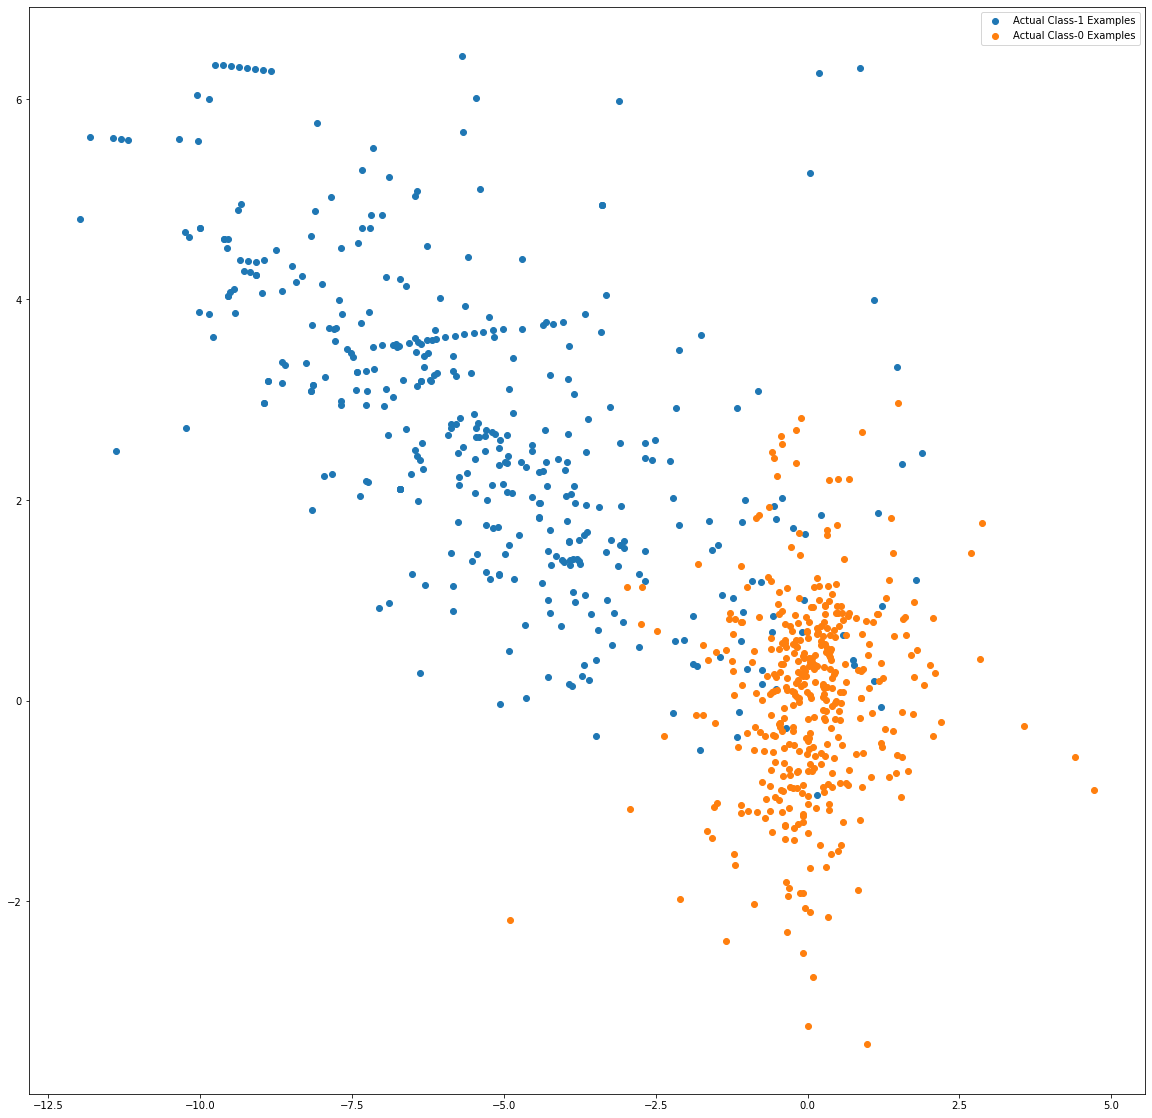

In [451]:
var_imp = []
for i in model_dt_adasyn.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(model_dt_adasyn.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(model_dt_adasyn.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(model_dt_adasyn.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(model_dt_adasyn.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(model_dt_adasyn.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [ ]:
#print('Train auc =', metrics.roc_auc_score(_________)
#fpr, tpr, thresholds = metrics.roc_curve(_________)
#threshold = thresholds[np.argmax(tpr-fpr)]
#print(threshold)

## Overall Summary

In [452]:
summary_df.head()

,Model,Class,Accuracy,Sensitivity,Specificity,F1-Score,AUC-ROC,Precision,FPR,TPR,Threshold
0,Linear Regression,Imbalanced,0.998982,0.562500,0.999719,0.768778,0.966812,0.771429,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.1145833333333333...",0.001116
1,XGBoost,Imbalanced,0.999456,0.750000,0.999877,0.822857,0.978537,0.911392,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.4166666666666667...",0.000074
2,Decision Tree,Imbalanced,0.998771,0.583333,0.999472,0.615385,0.921750,0.651163,"[0.0, 3.517040059086273e-05, 0.000211022403545...","[0.0, 0.25, 0.4270833333333333, 0.583333333333...",0.002184
3,Random Forest,Imbalanced,0.998929,0.635417,0.999543,0.666667,0.967234,0.701149,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.1354166666666666...",0.000329
4,SVM,Imbalanced,0.999087,0.697917,0.999596,0.720430,0.967234,0.744444,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.1354166666666666...",0.000329


In [460]:
summary_df.shape

(16, 11)

In [463]:
summary_knn = pd.read_excel('summary_df_knn.xlsx')
summary_knn.head()

,Model,Class,Accuracy,Sensitivity,Specificity,F1-Score,AUC-ROC,Precision,FPR,TPR,Threshold
0,KNN,Imbalanced,0.999438,0.739583,0.999877,0.816092,0.895697,0.910256,[0.00000000e+00 5.27556009e-05 1.23096402e-04 ...,[0. 0.64583333 0.73958333 0.79166667 1...,0.333333
1,KNN,Balanced - ROS,0.999280,0.729167,0.999736,0.773481,0.864451,0.823529,[0.00000000e+00 2.63778004e-04 1.00000000e+00],[0. 0.72916667 1. ],1.000000
2,KNN,Balanced - SMOTE,0.998982,0.770833,0.999367,0.718447,0.885100,0.672727,[0.00000000e+00 6.33067211e-04 1.00000000e+00],[0. 0.77083333 1. ],1.000000
3,KNN,Balanced - ADASYN,0.998982,0.770833,0.999367,0.718447,0.885100,0.672727,[0.00000000e+00 6.33067211e-04 1.00000000e+00],[0. 0.77083333 1. ],1.000000


In [464]:
summary_knn.shape

(4, 11)

In [465]:
frames = [summary_df, summary_knn]

In [466]:
result_df = pd.concat(frames)

In [467]:
result_df.shape

(20, 11)

In [472]:
result_df.head(20)

,Model,Class,Accuracy,Sensitivity,Specificity,F1-Score,AUC-ROC,Precision,FPR,TPR,Threshold,Model Identifier
0,Linear Regression,Imbalanced,0.998982,0.562500,0.999719,0.768778,0.966812,0.771429,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.1145833333333333...",0.001116,Linear Regression-Imbalanced
1,XGBoost,Imbalanced,0.999456,0.750000,0.999877,0.822857,0.978537,0.911392,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.4166666666666667...",0.000074,XGBoost-Imbalanced
2,Decision Tree,Imbalanced,0.998771,0.583333,0.999472,0.615385,0.921750,0.651163,"[0.0, 3.517040059086273e-05, 0.000211022403545...","[0.0, 0.25, 0.4270833333333333, 0.583333333333...",0.002184,Decision Tree-Imbalanced
3,Random Forest,Imbalanced,0.998929,0.635417,0.999543,0.666667,0.967234,0.701149,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.1354166666666666...",0.000329,Random Forest-Imbalanced
4,SVM,Imbalanced,0.999087,0.697917,0.999596,0.720430,0.967234,0.744444,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.1354166666666666...",0.000329,SVM-Imbalanced
5,Logistic Regression,Balanced - ROS,0.976212,0.885417,0.976365,0.111475,0.966812,0.059482,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.1145833333333333...",0.001116,Logistic Regression-Balanced - ROS
6,XGBoost,Balanced - ROS,0.999456,0.750000,0.999877,0.822857,0.978537,0.911392,"[0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...","[0.0, 0.010416666666666666, 0.4166666666666667...",0.000074,XGBoost-Balanced - ROS
7,Decision Tree,Balanced - ROS,0.981198,0.812500,0.981483,0.127139,0.893436,0.068966,"[0.0, 0.0007034080118172546, 0.001529912425702...","[0.0, 0.7395833333333334, 0.7708333333333334, ...",0.396605,Decision Tree-Balanced - ROS
8,Random Forest,Balanced - ROS,0.995278,0.812500,0.995586,0.367059,0.978178,0.237082,"[0.0, 0.0, 0.0, 0.0002637780044314705, 0.00028...","[0.0, 0.020833333333333332, 0.0416666666666666...",0.137155,Random Forest-Balanced - ROS
9,Logistic Regression,Balanced - SMOTE,0.974755,0.895833,0.974888,0.947900,0.970069,0.056803,"[0.0, 0.0001055112017725882, 0.000105511201772...","[0.0, 0.1875, 0.19791666666666666, 0.208333333...",0.389849,Logistic Regression-Balanced - SMOTE


In [471]:
# Add unique model identifier
result_df["Model Identifier"] = result_df["Model"] + '-'+ result_df["Class"]

In [ ]:
plt.figure(figsize=(7,3))
plt.plot(result_df["Model"],summary_df["Accuracy"])
plt.show()

In [474]:
# Compare the results of diffeernt models based on accuracy, sensitivity, specificity, precision, F1 score
cols = ['Accuracy', 'Sensitivity', 'Specificity', 'F1-Score', 'Precision']

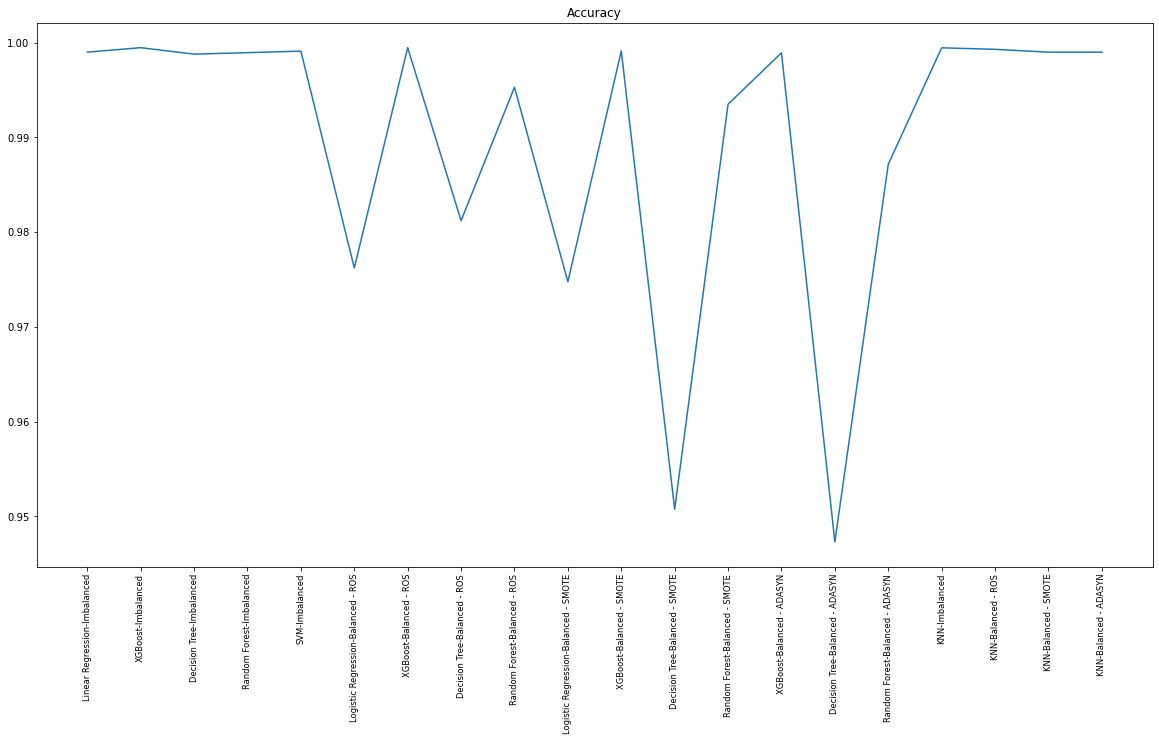

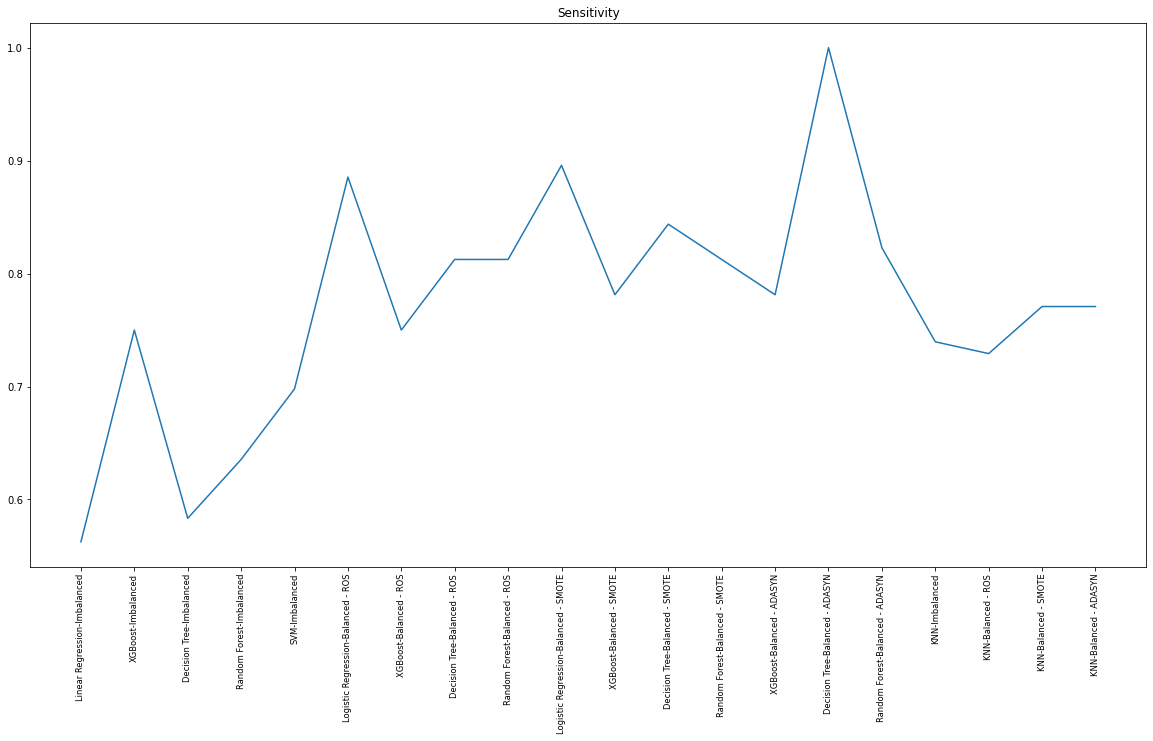

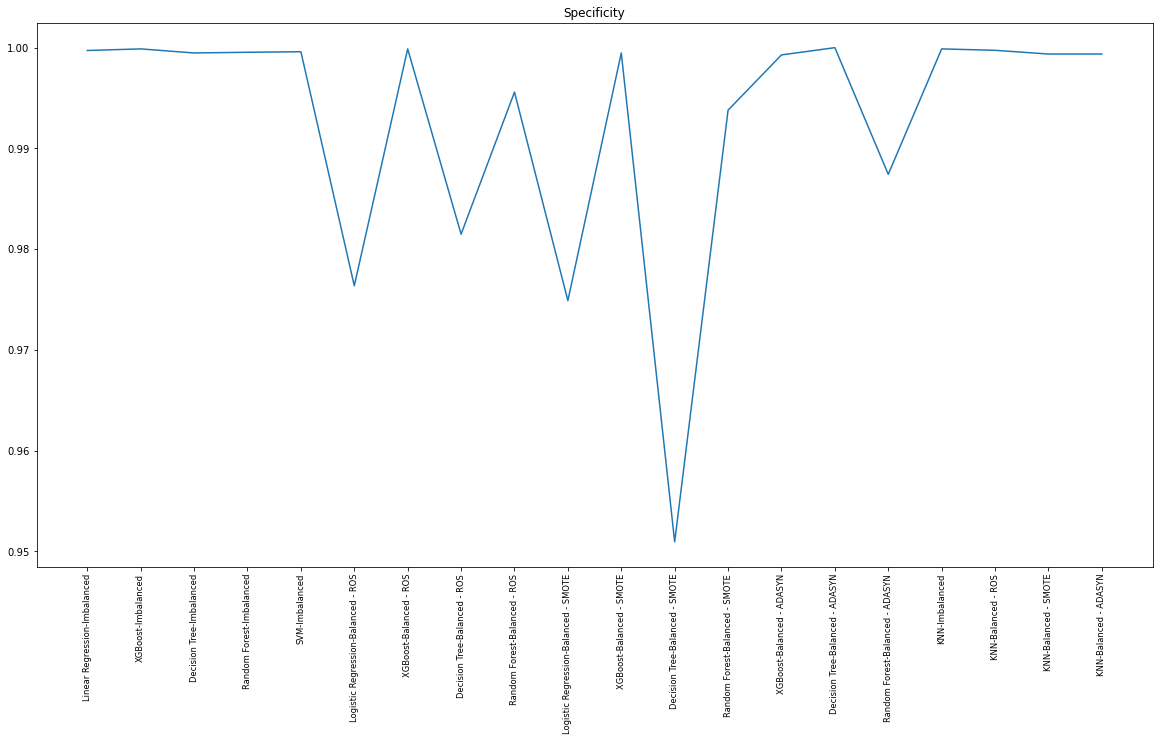

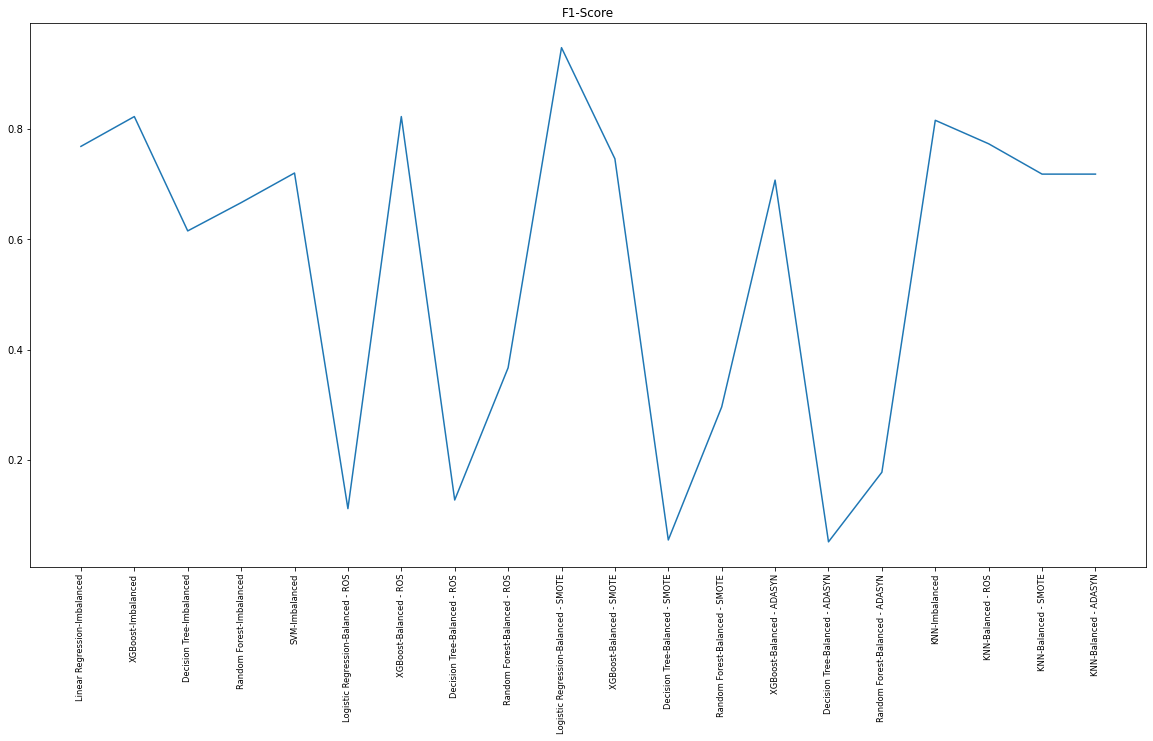

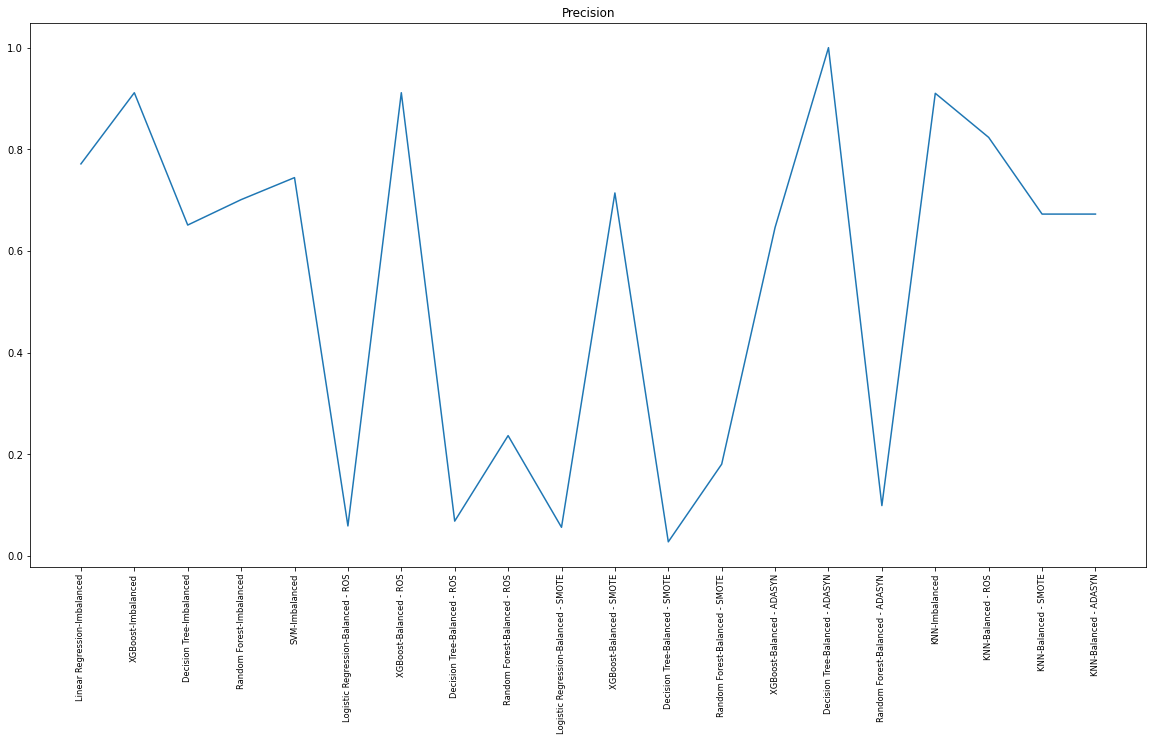

In [498]:
for col in cols:
    plt.figure(figsize=(20,10))
    plt.plot(result_df["Model Identifier"],result_df[col])
    plt.xticks(rotation=90, fontsize = 'small')
    plt.title(col)
    plt.show()

In [505]:
print(result_df[result_df['Accuracy']==result_df['Accuracy'].max()])

     Model           Class  Accuracy  Sensitivity  Specificity  F1-Score  \
1  XGBoost      Imbalanced  0.999456         0.75     0.999877  0.822857   
6  XGBoost  Balanced - ROS  0.999456         0.75     0.999877  0.822857   

    AUC-ROC  Precision                                                FPR  \
1  0.978537   0.911392  [0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...   
6  0.978537   0.911392  [0.0, 0.0, 0.0, 1.7585200295431366e-05, 1.7585...   

                                                 TPR  Threshold  \
1  [0.0, 0.010416666666666666, 0.4166666666666667...   0.000074   
6  [0.0, 0.010416666666666666, 0.4166666666666667...   0.000074   

         Model Identifier  
1      XGBoost-Imbalanced  
6  XGBoost-Balanced - ROS  


In [506]:
print(result_df[result_df['Sensitivity']==result_df['Sensitivity'].max()])

            Model              Class  Accuracy  Sensitivity  Specificity  \
14  Decision Tree  Balanced - ADASYN  0.947316          1.0          1.0   

    F1-Score   AUC-ROC  Precision  \
14  0.051217  0.914144        1.0   

                                                  FPR  \
14  [0.0, 3.517040059086273e-05, 0.000211022403545...   

                                                  TPR  Threshold  \
14  [0.0, 0.0, 0.0, 0.0, 0.7083333333333334, 0.708...       0.62   

                   Model Identifier  
14  Decision Tree-Balanced - ADASYN  


In [507]:
print(result_df[result_df['Specificity']==result_df['Specificity'].max()])

            Model              Class  Accuracy  Sensitivity  Specificity  \
14  Decision Tree  Balanced - ADASYN  0.947316          1.0          1.0   

    F1-Score   AUC-ROC  Precision  \
14  0.051217  0.914144        1.0   

                                                  FPR  \
14  [0.0, 3.517040059086273e-05, 0.000211022403545...   

                                                  TPR  Threshold  \
14  [0.0, 0.0, 0.0, 0.0, 0.7083333333333334, 0.708...       0.62   

                   Model Identifier  
14  Decision Tree-Balanced - ADASYN  


In [508]:
print(result_df[result_df['F1-Score']==result_df['F1-Score'].max()])

                 Model             Class  Accuracy  Sensitivity  Specificity  \
9  Logistic Regression  Balanced - SMOTE  0.974755     0.895833     0.974888   

   F1-Score   AUC-ROC  Precision  \
9    0.9479  0.970069   0.056803   

                                                 FPR  \
9  [0.0, 0.0001055112017725882, 0.000105511201772...   

                                                 TPR  Threshold  \
9  [0.0, 0.1875, 0.19791666666666666, 0.208333333...   0.389849   

                       Model Identifier  
9  Logistic Regression-Balanced - SMOTE  


In [510]:
print(result_df[result_df['Precision']==result_df['Precision'].max()])

            Model              Class  Accuracy  Sensitivity  Specificity  \
14  Decision Tree  Balanced - ADASYN  0.947316          1.0          1.0   

    F1-Score   AUC-ROC  Precision  \
14  0.051217  0.914144        1.0   

                                                  FPR  \
14  [0.0, 3.517040059086273e-05, 0.000211022403545...   

                                                  TPR  Threshold  \
14  [0.0, 0.0, 0.0, 0.0, 0.7083333333333334, 0.708...       0.62   

                   Model Identifier  
14  Decision Tree-Balanced - ADASYN  


### Summary
 - Accuracy - XGBoost Imbalanced, XG Boost Balanced ROS
 - Sensitivity - DT Balanced ADASYN
 - Specificity - DT Balanced ADASYN
 - F1 Score - Logistic Regression-Balanced - SMOTE
 - Precision - DT Balanced ADASYN 
 
 1. Precision

Precision is the rate of true positives out of all positive predictions. 
Having a high precision is very important because it means that we can be confident that our model is detecting fraud transactions.

2. Sensitivity

Sensitivity is the rate of true positives out of all transactions that are positive. In our case, this refers to the rate at which we are able to identify fraudulent transactions as fraudulent.


3. F1 Score

We would ideally need a trade off between Precision & Sensitivity and hence F1 score becomes highly important for our evaluation as its the haromnic mean of both. 
 
For this case, I would choose to go for Decision Tree-Balanced - ADASYN considering Precision as the main evaluation factor.

SVM, KNN, are computationally very expensive. I did try out KNN and considered the scores in the overall output but SVM  takes too much computational power and I was not able to evaluate the results of the same.

In [511]:
# Disclaimer - the svm & knn are attached as separate notebooks so that this 
# notebook runs independently and I did not want to add code to this which did not run as part of this notebook as 
# in case there are issues while copying the code from the otherr notebook then this main notebook will not run.